### annotation 파일 읽어들여 spacing 통일 전후 volume 추정값 비교

In [1]:
import os
import monai
import nibabel as nib
import numpy as np
from monai.transforms import Compose, LoadImaged, EnsureChannelFirstd, Orientationd, Spacingd
from monai.data import (
    DataLoader,
    CacheDataset,
    load_decathlon_datalist,
)
import pandas as pd
import matplotlib.pyplot as plt
import SimpleITK as sitk
from monai.transforms import (
    EnsureChannelFirstd,
    Compose,
    LoadImaged,
    Orientationd,
    RandFlipd,
    Spacingd,
    RandRotate90d,
    CenterSpatialCropd,
    RandSpatialCropd
)
# Enable deterministic training for reproducibility
monai.config.print_config()
monai.utils.set_determinism(seed=0)

def read_nifti_spacing_and_mask_count(nifti_file_path):
    try:
        # NIfTI 파일 열기
        img = nib.load(nifti_file_path)

        # spacing 정보 추출
        spacing = img.header.get_zooms()
        mask_voxel_count = np.count_nonzero(img.get_fdata()!=0)
        return mask_voxel_count, spacing[0], spacing[1], spacing[2]
    except Exception as e:
        print(f"Error reading NIfTI file: {str(e)}")
        return None

# Define a function to calculate the volume
def calculate_volume(mask_voxel_count, pixel_spacing_x, pixel_spacing_y, slice_gap):
#     return np.round((mask_voxel_count * pixel_spacing_x * pixel_spacing_y * slice_gap)/1000, 2)  ## mm3 to cc
    return (mask_voxel_count * pixel_spacing_x * pixel_spacing_y * slice_gap)/1000


directory_path = "/data/hanyang_Prostate/50_example/trim/sl_data/centerCrop_350_350_200/label_trim/"#"/data/hanyang_Prostate/50_example/original/1_50_trim_20230130/Total volume/"
class_name = 1

if class_name == 1:
    datasets = "/data/hanyang_Prostate/50_example/trim/sl_data/centerCrop_350_350_200/dataset_fold_testjinjin.json"
    print("total_prostate test : dataset.json")
# if args.class_name == 2:
#     datasets = args.root_path + "/dataset_2_fold{}.json".format(args.fold)
#     print("transition zone train :dataset_2.json")
files = load_decathlon_datalist(datasets, True, "training")

transforms = Compose(
        [
            LoadImaged(keys=["image", "label"]),
            EnsureChannelFirstd(keys=["image", "label"]),
            Orientationd(keys=["image", "label"], axcodes="RAI"),       #ALI
            Spacingd(
                keys=["image", "label"],
                pixdim=(0.8,0.8,0.8),
                mode=("bilinear", "nearest"),
            ),
            CenterSpatialCropd(keys=['image', 'label'], roi_size=(176,176,128)),
#             RandSpatialCropd(keys=['image', 'label'], roi_size=(256,256,128), random_size=False),#roi_size=(272,272,144), random_size=False),
            RandFlipd(
                keys=["image", "label"],
                spatial_axis=[0],
                prob=0.10,
            ),
            RandFlipd(
                keys=["image", "label"],
                spatial_axis=[1],
                prob=0.10,
            ),
            RandFlipd(
                keys=["image", "label"],
                spatial_axis=[2],
                prob=0.10,
            ),
            RandRotate90d(
                keys=["image", "label"],
                prob=0.10,
                max_k=3,
            ),

        ]
)

db = CacheDataset(
    data=files, transform=transforms, cache_num=6, cache_rate=1.0, num_workers=4
)

# for _ in range(len(db)):
       
#     mask_voxel_count2 = np.count_nonzero(db[_]['label'][0]!=0)
#     volume2 = calculate_volume(mask_voxel_count2, transforms.transforms[3].spacing_transform.pixdim[0], transforms.transforms[3].spacing_transform.pixdim[1], transforms.transforms[3].spacing_transform.pixdim[2])
    
#     tmp_itk = sitk.GetImageFromArray(db[_]['label'][0])
#     tmp_itk.SetSpacing((0.8 ,0.8 ,0.8))
#     sitk.WriteImage(tmp_itk, "tmp.nii.gz")
#     tmp_mask_voxel_count, tmp_pixel_spacing_x, tmp_pixel_spacing_y, tmp_slice_gap = read_nifti_spacing_and_mask_count("tmp.nii.gz")
#     tmp_volume = calculate_volume(tmp_mask_voxel_count, tmp_pixel_spacing_x, tmp_pixel_spacing_y, tmp_slice_gap)
    
#     no = db[_]['label_meta_dict']['filename_or_obj'].split('/')[-1][:8]
    
#     original_nifti_file_path=''
#     # 디렉토리 탐색
#     for root, dirs, files in os.walk(directory_path):
#         for file in files:
#             if no in file:
#                 # 검색한 문자열을 포함한 파일의 전체 경로 출력
#                 original_nifti_file_path = os.path.join(root, file)
# #                 print("\t Original file name:", original_nifti_file_path)
                
#     mask_voxel_count, pixel_spacing_x, pixel_spacing_y, slice_gap = read_nifti_spacing_and_mask_count(original_nifti_file_path)
#     volume = calculate_volume(mask_voxel_count, pixel_spacing_x, pixel_spacing_y, slice_gap)
    
#     print(f"No: {no}, Volume: {np.round(volume,1)} (cc), Transformed Volume: {np.round(volume2,1)} (cc)")
#     print(f"tmp_volume: {np.round(tmp_volume,1)} (cc)")
#     print(f"\t Original Pixel Spacing (x): {np.round(float(pixel_spacing_x),3)}")
#     print(f"\t Original Pixel Spacing (y): {np.round(float(pixel_spacing_y),3)}")
#     print(f"\t Original Slice Gap: {np.round(float(slice_gap),3)}")
#     print('------------------------------------------------------')
# print('done')

/root/anaconda3/envs/prostate/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


MONAI version: 1.2.0
Numpy version: 1.23.1
Pytorch version: 1.13.0
MONAI flags: HAS_EXT = False, USE_COMPILED = False, USE_META_DICT = False
MONAI rev id: c33f1ba588ee00229a309000e888f9817b4f1934
MONAI __file__: /root/anaconda3/envs/prostate/lib/python3.8/site-packages/monai/__init__.py

Optional dependencies:
Pytorch Ignite version: NOT INSTALLED or UNKNOWN VERSION.
ITK version: NOT INSTALLED or UNKNOWN VERSION.
Nibabel version: 5.1.0
scikit-image version: 0.19.2
Pillow version: 6.2.1
Tensorboard version: NOT INSTALLED or UNKNOWN VERSION.
gdown version: NOT INSTALLED or UNKNOWN VERSION.
TorchVision version: NOT INSTALLED or UNKNOWN VERSION.
tqdm version: 4.65.0
lmdb version: NOT INSTALLED or UNKNOWN VERSION.
psutil version: 5.9.0
pandas version: 1.4.4
einops version: NOT INSTALLED or UNKNOWN VERSION.
transformers version: NOT INSTALLED or UNKNOWN VERSION.
mlflow version: NOT INSTALLED or UNKNOWN VERSION.
pynrrd version: NOT INSTALLED or UNKNOWN VERSION.

For details about installing t

/root/anaconda3/envs/prostate/lib/python3.8/site-packages/monai/utils/deprecate_utils.py:321: FutureWarning: monai.transforms.io.dictionary LoadImaged.__init__:image_only: Current default value of argument `image_only=False` has been deprecated since version 1.1. It will be changed to `image_only=True` in version 1.3.
  warn_deprecated(argname, msg, warning_category)


total_prostate test : dataset.json


Loading dataset: 100%|██████████| 6/6 [00:09<00:00,  1.51s/it]


### Spacing 통일 여부에 따른 테스트셋에 대한 fold별 validation performace 비교

In [2]:
### with unifying spacing
# import numpy as np

dices=np.array([0.8727584053719873,0.886028415010999,0.845993061256093,0.8867125138100972,0.8800543297179617])*100
print("DICE")
print("Mean:", dices.mean(), "STD:", dices.std())

jaccs=np.array([0.7783564155370548,0.7963444527531813,0.7363816899794285,0.7987429792913189,0.7865555661466497])*100
print("Jacc")
print("Mean:", jaccs.mean(), "STD:", jaccs.std())

HDs=np.array([4.459498487141463,4.07205051820342,5.952619558402496,4.420096287594617,4.613919553666465])
print("HD")
print("Mean:", HDs.mean(), "STD:", HDs.std())

ASDs=np.array([1.7887478312346672,1.6129400814177521,2.244063198451727,1.7279977462609644,1.7353967994591124])
print("ASD")
print("Mean:", ASDs.mean(), "STD:", ASDs.std())

DICE
Mean: 87.43093450334275 STD: 1.502263217055699
Jacc
Mean: 77.92762207415267 STD: 2.2645330259819216
HD
Mean: 4.703636881001692 STD: 0.6491389811759107
ASD
Mean: 1.8218291313648447 STD: 0.21876265304846126


In [3]:
### without unifying spacing
# import numpy as np

dices_wo=np.array([0.877315132509052,0.8947155193753472,0.8493276590430133,0.8880653421659714,0.8827005646887409])*100
print("DICE")
print("Mean:", dices_wo.mean(), "STD:", dices_wo.std())

jaccs_wo=np.array([0.7850897178782225,0.810410356613118,0.7412313021694275,0.8000067969596143,0.791623883469603])*100
print("Jacc")
print("Mean:", jaccs_wo.mean(), "STD:", jaccs_wo.std())

HDs_wo=np.array([9.04842243040798,4.07103053293988,5.733904265350592,4.696959505213359,4.716420489648665])
print("HD")
print("Mean:", HDs_wo.mean(), "STD:", HDs_wo.std())

ASDs_wo=np.array([1.7287001094550327,1.545721189761277,2.2164615567937025,1.8076034611352134,1.7375953647909803])
print("ASD")
print("Mean:", ASDs_wo.mean(), "STD:", ASDs_wo.std())

DICE
Mean: 87.8424843556425 STD: 1.5649183547363759
Jacc
Mean: 78.56724114179971 STD: 2.3783238988490076
HD
Mean: 5.653347444712096 STD: 1.7792841470137772
ASD
Mean: 1.8072163363872413 STD: 0.22220413568505673


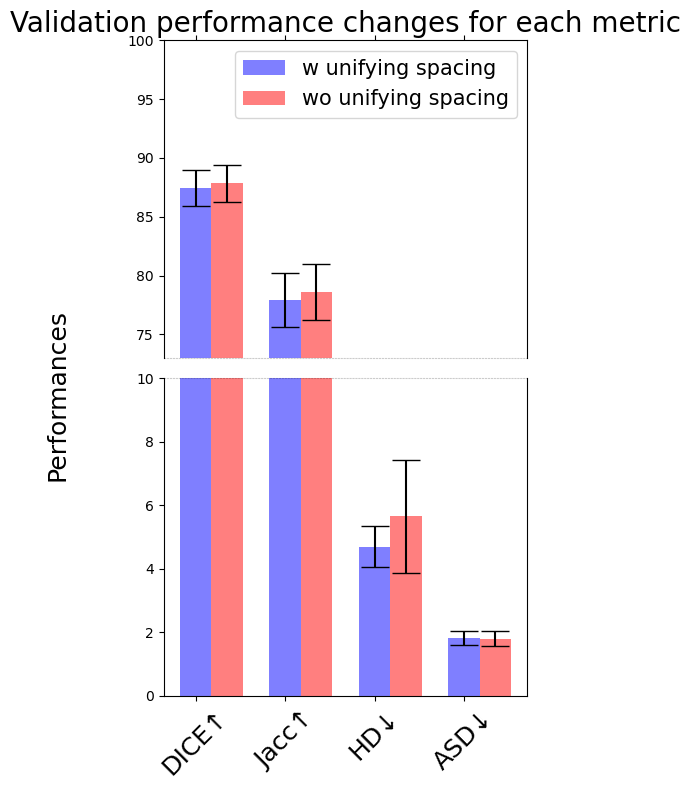

In [4]:
# import matplotlib.pyplot as plt

# Create lists for the plot
materials = ['DICE↑', 'Jacc↑', 'HD↓', 'ASD↓']
x_pos = np.arange(len(materials))
means = [dices.mean(), jaccs.mean(), HDs.mean(), ASDs.mean()]
errors = [dices.std(), jaccs.std(), HDs.std(), ASDs.std()]

means_wo = [dices_wo.mean(), jaccs_wo.mean(), HDs_wo.mean(), ASDs_wo.mean()]
errors_wo = [dices_wo.std(), jaccs_wo.std(), HDs_wo.std(), ASDs_wo.std()]

# Dodged Bar Chart (with same X coordinates side by side)
bar_width = 0.35
alpha = 0.5

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6, 8))
fig.subplots_adjust(hspace=0.05)  # adjust space between axes
p1_1 = ax1.bar(x_pos, means, 
             bar_width, yerr=errors, 
             color='b', 
             ecolor='black',
             alpha=alpha,
             capsize=10,
             label='w unifying spacing')
p1_2 = ax2.bar(x_pos, means, 
             bar_width, yerr=errors, 
             color='b', 
             ecolor='black',
             alpha=alpha,
             capsize=10,
             label='w unifying spacing')

p2_1 = ax1.bar(x_pos + bar_width, means_wo, 
             bar_width, yerr=errors_wo,
             color='r',
             ecolor='black',
             alpha=alpha,
             capsize=10,
             label='wo unifying spacing')

p2_2 = ax2.bar(x_pos + bar_width, means_wo, 
             bar_width, yerr=errors_wo,
             color='r',
             ecolor='black',
             alpha=alpha,
             capsize=10,
             label='wo unifying spacing')

ax1.set_title('Validation performance changes for each metric', fontsize=20)
# ylabel을 그림 전체에 대한 위치를 지정
fig.text(0, 0.5, 'Performances', va='center', rotation='vertical', fontsize=18)
# ax1.set_ylabel('Performances', fontsize=18)
ax1.set_ylim(73,100)
ax2.set_ylim(0,10)

# hide the spines between ax and ax2
# ax1.spines['bottom'].set_visible(False)
# ax2.spines['top'].set_visible(False)
ax1.spines['bottom'].set_linestyle('dotted')  # 점선
ax1.spines['bottom'].set_alpha(0.2)
ax2.spines['top'].set_linestyle('dotted')  # 점선
ax2.spines['top'].set_alpha(0.2)

ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()
ax2.set_xticks(x_pos)
ax2.set_xticklabels(materials, rotation=45, fontsize=18)
ax1.legend((p1_1[0], p2_1[0]), ('w unifying spacing', 'wo unifying spacing'), fontsize=15)
ax1.legend((p1_2[0], p2_2[0]), ('w unifying spacing', 'wo unifying spacing'), fontsize=15)

# Save the figure and show
plt.tight_layout()
# plt.savefig('bar_plot_with_error_bars.png')
plt.show()

### Spacing 통일 여부에 따른 학습셋에 대한 fold별 training performace 비교

In [5]:
### with unifying spacing
# import numpy as np

dices=np.array([0.9484927226872234,0.9651787073418863,0.9608063717401386,0.91858676457095,0.9579158156619929])*100
print("DICE")
print("Mean:", dices.mean(), "STD:", dices.std())

jaccs=np.array([0.9021957440758566,0.9328501744931657,0.9247446142304954,0.8504814242458864,0.9193920240458912])*100
print("Jacc")
print("Mean:", jaccs.mean(), "STD:", jaccs.std())

HDs=np.array([2.001097725764981,1.5237644430251804,1.5337107128660148,5.715669478413714,1.8014256462942497])
print("HD")
print("Mean:", HDs.mean(), "STD:", HDs.std())

ASDs=np.array([0.8714492976317452,0.6399673472966673,0.6862834845825081,1.2114942036327876,0.82172770480125])
print("ASD")
print("Mean:", ASDs.mean(), "STD:", ASDs.std())

DICE
Mean: 95.01960764004382 STD: 1.6725441576208595
Jacc
Mean: 90.5932796218259 STD: 2.94903400325242
HD
Mean: 2.5151336012728285 STD: 1.610158099131152
ASD
Mean: 0.8461844075889916 STD: 0.20138593456327264


In [6]:
### without unifying spacing
# import numpy as np

dices_wo=np.array([0.9398601734175902,0.954749765995212,0.933258719726231,0.9227202398251613,0.955771499829304])*100
print("DICE")
print("Mean:", dices_wo.mean(), "STD:", dices_wo.std())

jaccs_wo=np.array([0.8871770692921922,0.9137093022463547,0.8755371405224164,0.8581712012195059,0.9154534377434551])*100
print("Jacc")
print("Mean:", jaccs_wo.mean(), "STD:", jaccs_wo.std())

HDs_wo=np.array([13.136553371484691,3.5852982013915105,2.491785877950665,2.9364766524720105,1.860422333174053])
print("HD")
print("Mean:", HDs_wo.mean(), "STD:", HDs_wo.std())

ASDs_wo=np.array([0.9535233111404582,0.7854481742172263,1.0373418458445687,1.1704371667219289,0.7934224747762416])
print("ASD")
print("Mean:", ASDs_wo.mean(), "STD:", ASDs_wo.std())

DICE
Mean: 94.12720797586996 STD: 1.2666960109824095
Jacc
Mean: 89.00096302047848 STD: 2.2091734726468752
HD
Mean: 4.802107287294586 STD: 4.205122802753055
ASD
Mean: 0.9480345945400848 STD: 0.1468387325672978


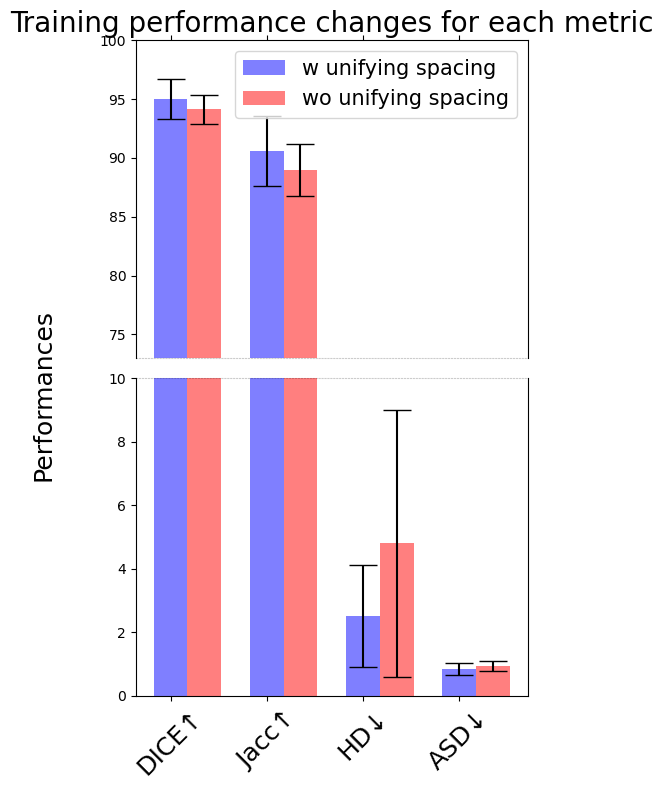

In [7]:
# import matplotlib.pyplot as plt

# Create lists for the plot
materials = ['DICE↑', 'Jacc↑', 'HD↓', 'ASD↓']
x_pos = np.arange(len(materials))
means = [dices.mean(), jaccs.mean(), HDs.mean(), ASDs.mean()]
errors = [dices.std(), jaccs.std(), HDs.std(), ASDs.std()]

means_wo = [dices_wo.mean(), jaccs_wo.mean(), HDs_wo.mean(), ASDs_wo.mean()]
errors_wo = [dices_wo.std(), jaccs_wo.std(), HDs_wo.std(), ASDs_wo.std()]

# Dodged Bar Chart (with same X coordinates side by side)
bar_width = 0.35
alpha = 0.5

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6, 8))
fig.subplots_adjust(hspace=0.05)  # adjust space between axes
p1_1 = ax1.bar(x_pos, means, 
             bar_width, yerr=errors, 
             color='b', 
             ecolor='black',
             alpha=alpha,
             capsize=10,
             label='w unifying spacing')
p1_2 = ax2.bar(x_pos, means, 
             bar_width, yerr=errors, 
             color='b', 
             ecolor='black',
             alpha=alpha,
             capsize=10,
             label='w unifying spacing')

p2_1 = ax1.bar(x_pos + bar_width, means_wo, 
             bar_width, yerr=errors_wo,
             color='r',
             ecolor='black',
             alpha=alpha,
             capsize=10,
             label='wo unifying spacing')

p2_2 = ax2.bar(x_pos + bar_width, means_wo, 
             bar_width, yerr=errors_wo,
             color='r',
             ecolor='black',
             alpha=alpha,
             capsize=10,
             label='wo unifying spacing')

ax1.set_title('Training performance changes for each metric', fontsize=20)
# ylabel을 그림 전체에 대한 위치를 지정
fig.text(0, 0.5, 'Performances', va='center', rotation='vertical', fontsize=18)
# ax1.set_ylabel('Performances', fontsize=18)
ax1.set_ylim(73,100)
ax2.set_ylim(0,10)

# hide the spines between ax and ax2
# ax1.spines['bottom'].set_visible(False)
# ax2.spines['top'].set_visible(False)
ax1.spines['bottom'].set_linestyle('dotted')  # 점선
ax1.spines['bottom'].set_alpha(0.2)
ax2.spines['top'].set_linestyle('dotted')  # 점선
ax2.spines['top'].set_alpha(0.2)

ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()
ax2.set_xticks(x_pos)
ax2.set_xticklabels(materials, rotation=45, fontsize=18)
ax1.legend((p1_1[0], p2_1[0]), ('w unifying spacing', 'wo unifying spacing'), fontsize=15)
ax1.legend((p1_2[0], p2_2[0]), ('w unifying spacing', 'wo unifying spacing'), fontsize=15)

# Save the figure and show
plt.tight_layout()
# plt.savefig('bar_plot_with_error_bars.png')
plt.show()

### Fold별 각각의 val set prediction에 대한 volume 추정

In [8]:
### /data/hanyang_Prostate/Prostate/prostate_1c_test_result/test/unet_10000_30000_fold1/ 
### 디렉토리 안에 있는 _gt.nii.gz파일을 읽어들여서 먼저 계산하고, 문자열 파싱해서 환자번호로 _pred.nii.gz 계산하고, 
###/data/hanyang_Prostate/50_example/original/1_50_trim_20230130/Total volume/ 디렉토리 안에서 
###문자열로 다시 파일이름 조회해서 진짜 gt파일상에서 volume 계산하여
###전부 리스트로 저장
### 세 리스트 a(가짜 gt), b(prediction), c(진짜 gt) 간 |a-b|와 |b-c|를 구하기, 평균이랑 분산도 내기
### 이철민 교수님께서 주신 excel 파일 읽어들여서 d 리스트 만들고 |a-d|와 |d-c|를 구하기, 평균이랑 분산도 내기
### TRUS_HP_201706_202206_20230904.xlsx ### 여기까지 구현됨

In [9]:
### 제일 잘한 모델로부터 다시 |a-b|, |b-c|, |a-d|, |d-c| 계산하기  ### 여기까지 구현됨
### correlation coef 구하기 r^2 구하기, least square 구하기(알파폴드논문에서 처럼)
### plotting은 어떨까?

In [10]:
# import pandas as pd

# Excel 초음파 파일 읽기
# df = pd.read_excel('./TRUS_HP_201706_202206_20230904.xlsx')
df = pd.read_excel('./TRUS_HP_201706_202206_20230904.xlsx', engine='openpyxl', dtype={'A': str})

# 제목 행 삭제
# df = df.iloc[1:]

# A열부터 50번째 열까지만 선택
df = df.iloc[:49]

# A열을 인덱스로 설정
# 'ID' 열을 문자열로 변환하고 8자리로 맞추기 위해 앞에 '0' 추가
df['ID'] = df['ID'].astype(str).str.zfill(8)
df.set_index('ID', inplace=True)
# print(df)
# H열의 데이터를 딕셔너리로 추출
TRUS = df['Total volume \n(US)'].to_dict()

# 결과 출력
# print(TRUS)


In [11]:
# import os
# import numpy as np

# 디렉토리 경로 설정
base_directory = '/data/hanyang_Prostate/Prostate/prostate_1c_test_result/test_230922_w_spacing/'
directory_paths = [os.path.join(base_directory, f'unet_10000_30000_fold{i}/test/') for i in range(1, 6)]
directory_path_realgt = '/data/hanyang_Prostate/50_example/original/1_50_trim_20230130/Total volume/'

# 초기화할 리스트
a_lists = [[] for _ in range(5)]  # 각 폴드의 volume_gt 리스트
b_lists = [[] for _ in range(5)]  # 각 폴드의 volume_pred 리스트
c_lists = [[] for _ in range(5)]  # 각 폴드의 volume_realgt 리스트
d_lists = [[] for _ in range(5)]  # 각 폴드의 volume_TRUS 리스트
cnt = 0
# 디렉토리별로 처리
for fold_idx, directory_path in enumerate(directory_paths, start=1):
    print("Directory: ", directory_path)
    # 디렉토리 내의 모든 파일 검색
    for filename in os.listdir(directory_path):
        # 파일 이름이 "_gt.nii.gz"로 끝나는 경우에만 처리
        if filename.endswith('_gt.nii.gz'):
            # 파일의 전체 경로 생성
            gt_file_path = os.path.join(directory_path, filename)
            
            # 해당 _gt 파일과 동일한 이름 구조를 가진 _pred 파일 찾기
            pred_filename = filename.replace('_gt.nii.gz', '_pred.nii.gz')
            pred_file_path = os.path.join(directory_path, pred_filename)
    
            # _pred 파일이 존재하면 계산 수행
            if os.path.exists(pred_file_path):
                # _gt 파일의 정보를 읽어오고 volume 계산
                mask_voxel_count_gt, pixel_spacing_x_gt, pixel_spacing_y_gt, slice_gap_gt = read_nifti_spacing_and_mask_count(gt_file_path)
                volume_gt = calculate_volume(mask_voxel_count_gt, pixel_spacing_x_gt, pixel_spacing_y_gt, slice_gap_gt)
                
                # _pred 파일의 정보를 읽어오고 volume 계산
                mask_voxel_count_pred, pixel_spacing_x_pred, pixel_spacing_y_pred, slice_gap_pred = read_nifti_spacing_and_mask_count(pred_file_path)
                volume_pred = calculate_volume(mask_voxel_count_pred, pixel_spacing_x_pred, pixel_spacing_y_pred, slice_gap_pred)
                
                # 검색할 문자열 설정
                a_value = filename.split("_")[1]
    
                # /data/hanyang_Prostate/50_example/original/1_50_trim_20230130/Total volume/ 디렉토리 내의 파일 검색
                for realgt_filename in os.listdir(directory_path_realgt):
                    # 파일 이름에 검색할 문자열이 포함되어 있는지 확인
                    if a_value in realgt_filename:
                        mask_voxel_count_realgt, pixel_spacing_x_realgt, pixel_spacing_y_realgt, slice_gap_realgt = read_nifti_spacing_and_mask_count(os.path.join(directory_path_realgt, realgt_filename))
                        volume_realgt = calculate_volume(mask_voxel_count_realgt, pixel_spacing_x_realgt, pixel_spacing_y_realgt, slice_gap_realgt)
                        
                        # 값 저장
                        if a_value in TRUS:
                            cnt += 1
                            a_lists[fold_idx - 1].append(volume_gt)
                            b_lists[fold_idx - 1].append(volume_pred)
                            c_lists[fold_idx - 1].append(volume_realgt)
                            d_lists[fold_idx - 1].append(TRUS[a_value])
                            # 출력
                            print(f"No.: {a_value}")
                            print(f"\t Volume (TRUS): {TRUS[a_value]}")
                            print(f"\t Pixel Spacing X (realgt): {np.round(float(pixel_spacing_x_realgt),3)}")
                            print(f"\t Volume (realgt): {np.round(volume_realgt,1)}")
                            print(f"\t Pixel Spacing X (gt): {np.round(float(pixel_spacing_x_gt),3)}")
                            print(f"\t Volume (gt): {np.round(volume_gt,1)}")
                            print(f"\t Pixel Spacing X (pred): {np.round(float(pixel_spacing_x_pred),3)}")
                            print(f"\t Volume (pred): {np.round(volume_pred,1)}")
                            print("-----------------------------------------")
print(cnt)

Directory:  /data/hanyang_Prostate/Prostate/prostate_1c_test_result/test_230922_w_spacing/unet_10000_30000_fold1/test/
No.: 00800131
	 Volume (TRUS): 30.0
	 Pixel Spacing X (realgt): 0.782
	 Volume (realgt): 30.3
	 Pixel Spacing X (gt): 0.8
	 Volume (gt): 30.0
	 Pixel Spacing X (pred): 0.8
	 Volume (pred): 29.3
-----------------------------------------
No.: 00818049
	 Volume (TRUS): 17.4
	 Pixel Spacing X (realgt): 0.755
	 Volume (realgt): 17.1
	 Pixel Spacing X (gt): 0.8
	 Volume (gt): 17.2
	 Pixel Spacing X (pred): 0.8
	 Volume (pred): 14.4
-----------------------------------------
No.: 00851016
	 Volume (TRUS): 35.4
	 Pixel Spacing X (realgt): 0.709
	 Volume (realgt): 37.4
	 Pixel Spacing X (gt): 0.8
	 Volume (gt): 37.4
	 Pixel Spacing X (pred): 0.8
	 Volume (pred): 38.2
-----------------------------------------
No.: 01054688
	 Volume (TRUS): 17.0
	 Pixel Spacing X (realgt): 0.782
	 Volume (realgt): 16.1
	 Pixel Spacing X (gt): 0.8
	 Volume (gt): 16.1
	 Pixel Spacing X (pred): 0.8
	

No.: 02820034
	 Volume (TRUS): 21.6
	 Pixel Spacing X (realgt): 0.717
	 Volume (realgt): 20.5
	 Pixel Spacing X (gt): 0.8
	 Volume (gt): 20.4
	 Pixel Spacing X (pred): 0.8
	 Volume (pred): 22.4
-----------------------------------------
No.: 02882776
	 Volume (TRUS): 19.2
	 Pixel Spacing X (realgt): 0.74
	 Volume (realgt): 19.2
	 Pixel Spacing X (gt): 0.8
	 Volume (gt): 19.2
	 Pixel Spacing X (pred): 0.8
	 Volume (pred): 21.6
-----------------------------------------
No.: 02948957
	 Volume (TRUS): 43.18
	 Pixel Spacing X (realgt): 0.74
	 Volume (realgt): 43.8
	 Pixel Spacing X (gt): 0.8
	 Volume (gt): 43.9
	 Pixel Spacing X (pred): 0.8
	 Volume (pred): 40.6
-----------------------------------------
No.: 02949843
	 Volume (TRUS): 31.0
	 Pixel Spacing X (realgt): 0.782
	 Volume (realgt): 35.0
	 Pixel Spacing X (gt): 0.8
	 Volume (gt): 34.7
	 Pixel Spacing X (pred): 0.8
	 Volume (pred): 36.1
-----------------------------------------
No.: 02951189
	 Volume (TRUS): 25.3
	 Pixel Spacing X (re

Fold 1:
|processed gt - gt| 평균: 0.13975703487231889
|processed gt - gt| 표준편차: 0.15330268500491193
|processed gt - prediction| 평균: 2.6835969199661287
|processed gt - prediction| 표준편차: 2.3598601847283622
|prediction - gt| 평균: 2.691651589837679
|prediction - gt| 표준편차: 2.4487395478157152

Fold 2:
|processed gt - gt| 평균: 0.15608765707386477
|processed gt - gt| 표준편차: 0.11466341349982319
|processed gt - prediction| 평균: 2.771057901653716
|processed gt - prediction| 표준편차: 2.237633953575321
|prediction - gt| 평균: 2.7134274897392427
|prediction - gt| 표준편차: 2.1351601585878464

Fold 3:
|processed gt - gt| 평균: 0.17254566849241665
|processed gt - gt| 표준편차: 0.11158618069675802
|processed gt - prediction| 평균: 5.082061027185824
|processed gt - prediction| 표준편차: 4.040236356348818
|prediction - gt| 평균: 5.05811549778125
|prediction - gt| 표준편차: 4.114335301813558

Fold 4:
|processed gt - gt| 평균: 0.12100165209546035
|processed gt - gt| 표준편차: 0.10217186093250318
|processed gt - prediction| 평균: 3.322521748528292

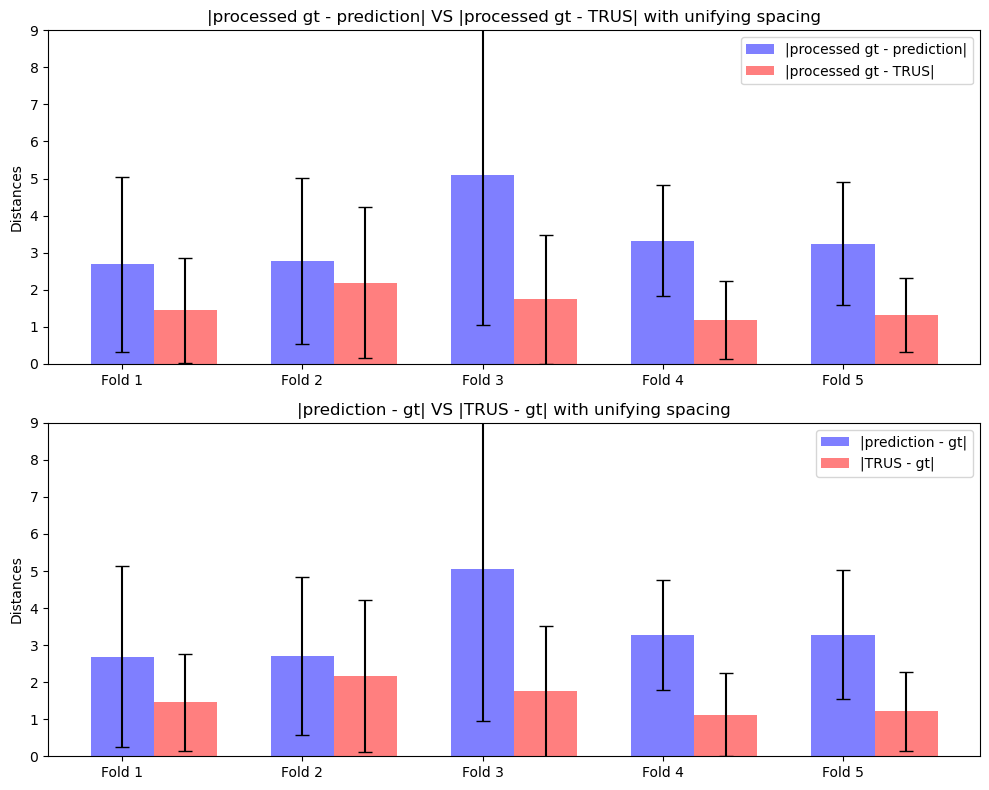

In [12]:
# 데이터 처리
mean_ac = []
std_ac = []

mean_ab = []
std_ab = []
mean_bc = []
std_bc = []
mean_ad = []
std_ad = []
mean_dc = []
std_dc = []

# Fold 수
num_folds = len(a_lists)

# fold별로 |a-b|와 |b-c| 계산
for fold_idx, (a_values, b_values, c_values) in enumerate(zip(a_lists, b_lists, c_lists), start=1):
    abs_diff_ac_fold = np.abs(np.array(a_values) - np.array(c_values))
    abs_diff_ab_fold = np.abs(np.array(a_values) - np.array(b_values))
    abs_diff_bc_fold = np.abs(np.array(b_values) - np.array(c_values))
    
    mean_ac_fold = np.mean(abs_diff_ac_fold)
    std_ac_fold = np.std(abs_diff_ac_fold)
    mean_ab_fold = np.mean(abs_diff_ab_fold)
    std_ab_fold = np.std(abs_diff_ab_fold)
    mean_bc_fold = np.mean(abs_diff_bc_fold)
    std_bc_fold = np.std(abs_diff_bc_fold)
    mean_ab.append(mean_ab_fold)
    std_ab.append(std_ab_fold)
    mean_bc.append(mean_bc_fold)
    std_bc.append(std_bc_fold)
    
    print(f"Fold {fold_idx}:")
    print(f"|processed gt - gt| 평균: {mean_ac_fold}")
    print(f"|processed gt - gt| 표준편차: {std_ac_fold}")
    print(f"|processed gt - prediction| 평균: {mean_ab_fold}")
    print(f"|processed gt - prediction| 표준편차: {std_ab_fold}")
    print(f"|prediction - gt| 평균: {mean_bc_fold}")
    print(f"|prediction - gt| 표준편차: {std_bc_fold}")
    print()

# fold별로 |a-d|와 |d-c| 계산 : fold마다 validation에 사용된 데이터가 다를거라서
for fold_idx, (a_values, d_values, c_values) in enumerate(zip(a_lists, d_lists, c_lists), start=1):
    abs_diff_ad_fold = np.abs(np.array(a_values) - np.array(d_values))
    abs_diff_dc_fold = np.abs(np.array(d_values) - np.array(c_values))
    
    mean_ad_fold = np.mean(abs_diff_ad_fold)
    std_ad_fold = np.std(abs_diff_ad_fold)
    mean_dc_fold = np.mean(abs_diff_dc_fold)
    std_dc_fold = np.std(abs_diff_dc_fold)
    mean_ad.append(mean_ad_fold)
    std_ad.append(std_ad_fold)
    mean_dc.append(mean_dc_fold)
    std_dc.append(std_dc_fold)
    
    print(f"Fold {fold_idx}:")
    print(f"|processed gt - TRUS| 평균: {mean_ad_fold}")
    print(f"|processed gt - TRUS| 표준편차: {std_ad_fold}")
    print(f"|TRUS - gt| 평균: {mean_dc_fold}")
    print(f"|TRUS - gt| 표준편차: {std_dc_fold}")
    print()
    
# Fold별 바 차트 그리기
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
bar_width = 0.35

# 첫 번째 plot
axes[0].bar(range(1, num_folds + 1), mean_ab, bar_width, yerr=std_ab, color='b', alpha=0.5, capsize=5, label='|processed gt - prediction|')
axes[0].bar([x + bar_width for x in range(1, num_folds + 1)], mean_ad, bar_width, color='r', yerr=std_ad, alpha=0.5, capsize=5, label='|processed gt - TRUS|')
axes[0].set_xticks(range(1, num_folds + 1))
axes[0].set_xticklabels([f'Fold {i}' for i in range(1, num_folds + 1)])
axes[0].set_ylabel('Distances')
axes[0].set_title('|processed gt - prediction| VS |processed gt - TRUS| with unifying spacing')
axes[0].set_ylim([0,9])
axes[0].legend()

# 두 번째 plot
axes[1].bar(range(1, num_folds + 1), mean_bc, bar_width, yerr=std_bc, color='b', alpha=0.5, capsize=5, label='|prediction - gt|')
axes[1].bar([x + bar_width for x in range(1, num_folds + 1)], mean_dc, bar_width, yerr=std_dc, color='r', alpha=0.5, capsize=5, label='|TRUS - gt|')
axes[1].set_xticks(range(1, num_folds + 1))
axes[1].set_xticklabels([f'Fold {i}' for i in range(1, num_folds + 1)])
axes[1].set_ylabel('Distances')
axes[1].set_title('|prediction - gt| VS |TRUS - gt| with unifying spacing')
axes[1].set_ylim([0,9])
axes[1].legend()

plt.tight_layout()
plt.show()

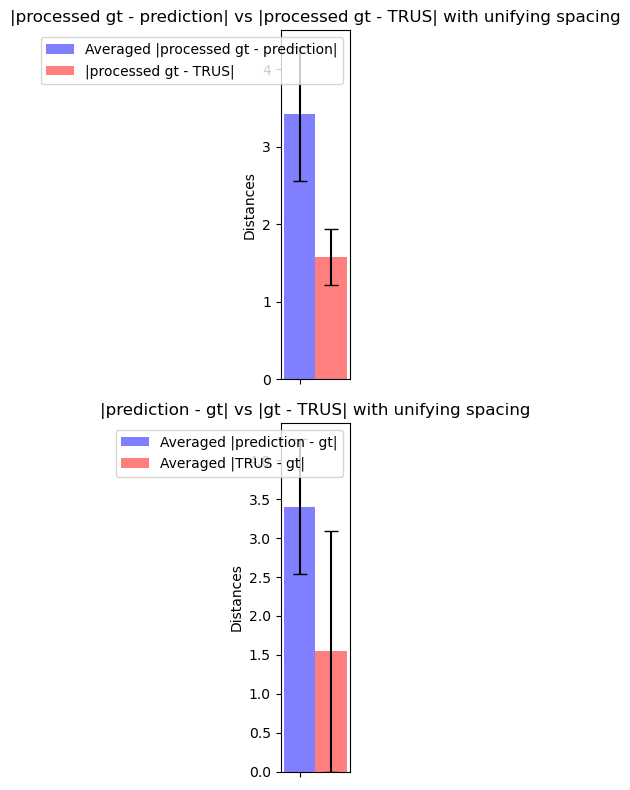

In [13]:
fig, axes = plt.subplots(2, 1, figsize=(4, 8))
bar_width = 0.35

# 첫 번째 plot
axes[0].bar([1], [np.mean(mean_ab)], bar_width, yerr=[np.std(mean_ab)], color='b', alpha=0.5, capsize=5, label='Averaged |processed gt - prediction|')
axes[0].bar([1 + bar_width], [np.mean(mean_ad)], bar_width, color='r', yerr=[np.std(mean_ad)], alpha=0.5, capsize=5, label='|processed gt - TRUS|')
axes[0].set_xticks([1])
axes[0].set_xticklabels([''])
axes[0].set_ylabel('Distances')
axes[0].set_title('|processed gt - prediction| vs |processed gt - TRUS| with unifying spacing')
axes[0].legend()

# 두 번째 plot
axes[1].bar([1], [np.mean(mean_bc)], bar_width, yerr=[np.std(mean_bc)], color='b', alpha=0.5, capsize=5, label='Averaged |prediction - gt|')
axes[1].bar([1 + bar_width], [np.mean(mean_dc)], bar_width, yerr=[np.mean(mean_dc)], color='r', alpha=0.5, capsize=5, label='Averaged |TRUS - gt|')
axes[1].set_xticks([1])
axes[1].set_xticklabels([''])
axes[1].set_ylabel('Distances')
axes[1].set_title('|prediction - gt| vs |gt - TRUS| with unifying spacing')
axes[1].legend()

plt.tight_layout()
plt.show()

In [14]:
# import os
# import numpy as np

# 디렉토리 경로 설정
base_directory = '/data/hanyang_Prostate/Prostate/prostate_1c_test_result/test_230922_wo_spacing/'
directory_paths = [os.path.join(base_directory, f'vnet_30000_fold{i}/test/') for i in range(1, 6)]
directory_path_realgt = '/data/hanyang_Prostate/50_example/original/1_50_trim_20230130/Total volume/'

# 초기화할 리스트
a_lists = [[] for _ in range(5)]  # 각 폴드의 volume_gt 리스트
b_lists = [[] for _ in range(5)]  # 각 폴드의 volume_pred 리스트
c_lists = [[] for _ in range(5)]  # 각 폴드의 volume_realgt 리스트
d_lists = [[] for _ in range(5)]  # 각 폴드의 volume_TRUS 리스트
cnt = 0
# 디렉토리별로 처리
for fold_idx, directory_path in enumerate(directory_paths, start=1):
    print("Directory: ", directory_path)
    # 디렉토리 내의 모든 파일 검색
    for filename in os.listdir(directory_path):
        # 파일 이름이 "_gt.nii.gz"로 끝나는 경우에만 처리
        if filename.endswith('_gt.nii.gz'):
            # 파일의 전체 경로 생성
            gt_file_path = os.path.join(directory_path, filename)
            
            # 해당 _gt 파일과 동일한 이름 구조를 가진 _pred 파일 찾기
            pred_filename = filename.replace('_gt.nii.gz', '_pred.nii.gz')
            pred_file_path = os.path.join(directory_path, pred_filename)
    
            # _pred 파일이 존재하면 계산 수행
            if os.path.exists(pred_file_path):
                # _gt 파일의 정보를 읽어오고 volume 계산
                mask_voxel_count_gt, pixel_spacing_x_gt, pixel_spacing_y_gt, slice_gap_gt = read_nifti_spacing_and_mask_count(gt_file_path)
                volume_gt = calculate_volume(mask_voxel_count_gt, pixel_spacing_x_gt, pixel_spacing_y_gt, slice_gap_gt)
                
                # _pred 파일의 정보를 읽어오고 volume 계산
                mask_voxel_count_pred, pixel_spacing_x_pred, pixel_spacing_y_pred, slice_gap_pred = read_nifti_spacing_and_mask_count(pred_file_path)
                volume_pred = calculate_volume(mask_voxel_count_pred, pixel_spacing_x_pred, pixel_spacing_y_pred, slice_gap_pred)
                
                # 검색할 문자열 설정
                a_value = filename.split("_")[1]
    
                # /data/hanyang_Prostate/50_example/original/1_50_trim_20230130/Total volume/ 디렉토리 내의 파일 검색
                for realgt_filename in os.listdir(directory_path_realgt):
                    # 파일 이름에 검색할 문자열이 포함되어 있는지 확인
                    if a_value in realgt_filename:
                        mask_voxel_count_realgt, pixel_spacing_x_realgt, pixel_spacing_y_realgt, slice_gap_realgt = read_nifti_spacing_and_mask_count(os.path.join(directory_path_realgt, realgt_filename))
                        volume_realgt = calculate_volume(mask_voxel_count_realgt, pixel_spacing_x_realgt, pixel_spacing_y_realgt, slice_gap_realgt)
                        
                        # 값 저장
                        if a_value in TRUS:
                            cnt += 1
                            a_lists[fold_idx - 1].append(volume_gt)
                            b_lists[fold_idx - 1].append(volume_pred)
                            c_lists[fold_idx - 1].append(volume_realgt)
                            d_lists[fold_idx - 1].append(TRUS[a_value])
                            # 출력
                            print(f"No.: {a_value}")
                            print(f"\t Volume (TRUS): {TRUS[a_value]}")
                            print(f"\t Pixel Spacing X (realgt): {np.round(float(pixel_spacing_x_realgt),3)}")
                            print(f"\t Volume (realgt): {np.round(volume_realgt,1)}")
                            print(f"\t Pixel Spacing X (gt): {np.round(float(pixel_spacing_x_gt),3)}")
                            print(f"\t Volume (gt): {np.round(volume_gt,1)}")
                            print(f"\t Pixel Spacing X (pred): {np.round(float(pixel_spacing_x_pred),3)}")
                            print(f"\t Volume (pred): {np.round(volume_pred,1)}")
                            print("-----------------------------------------")
print(cnt)

Directory:  /data/hanyang_Prostate/Prostate/prostate_1c_test_result/test_230922_wo_spacing/vnet_30000_fold1/test/
No.: 00800131
	 Volume (TRUS): 30.0
	 Pixel Spacing X (realgt): 0.782
	 Volume (realgt): 30.3
	 Pixel Spacing X (gt): 0.782
	 Volume (gt): 30.3
	 Pixel Spacing X (pred): 0.782
	 Volume (pred): 31.1
-----------------------------------------
No.: 00818049
	 Volume (TRUS): 17.4
	 Pixel Spacing X (realgt): 0.755
	 Volume (realgt): 17.1
	 Pixel Spacing X (gt): 0.755
	 Volume (gt): 17.2
	 Pixel Spacing X (pred): 0.755
	 Volume (pred): 16.5
-----------------------------------------
No.: 00851016
	 Volume (TRUS): 35.4
	 Pixel Spacing X (realgt): 0.709
	 Volume (realgt): 37.4
	 Pixel Spacing X (gt): 0.709
	 Volume (gt): 37.4
	 Pixel Spacing X (pred): 0.709
	 Volume (pred): 38.1
-----------------------------------------
No.: 01054688
	 Volume (TRUS): 17.0
	 Pixel Spacing X (realgt): 0.782
	 Volume (realgt): 16.1
	 Pixel Spacing X (gt): 0.782
	 Volume (gt): 16.1
	 Pixel Spacing X (pre

No.: 02820034
	 Volume (TRUS): 21.6
	 Pixel Spacing X (realgt): 0.717
	 Volume (realgt): 20.5
	 Pixel Spacing X (gt): 0.717
	 Volume (gt): 20.5
	 Pixel Spacing X (pred): 0.717
	 Volume (pred): 21.7
-----------------------------------------
No.: 02882776
	 Volume (TRUS): 19.2
	 Pixel Spacing X (realgt): 0.74
	 Volume (realgt): 19.2
	 Pixel Spacing X (gt): 0.74
	 Volume (gt): 19.2
	 Pixel Spacing X (pred): 0.74
	 Volume (pred): 19.9
-----------------------------------------
No.: 02948957
	 Volume (TRUS): 43.18
	 Pixel Spacing X (realgt): 0.74
	 Volume (realgt): 43.8
	 Pixel Spacing X (gt): 0.74
	 Volume (gt): 43.8
	 Pixel Spacing X (pred): 0.74
	 Volume (pred): 33.3
-----------------------------------------
No.: 02949843
	 Volume (TRUS): 31.0
	 Pixel Spacing X (realgt): 0.782
	 Volume (realgt): 35.0
	 Pixel Spacing X (gt): 0.782
	 Volume (gt): 35.0
	 Pixel Spacing X (pred): 0.782
	 Volume (pred): 36.0
-----------------------------------------
No.: 02951189
	 Volume (TRUS): 25.3
	 Pixel S

Fold 1:
|processed gt - prediction| 평균: 2.1596771744908128
|processed gt - prediction| 표준편차: 2.2473507067925587
|prediction - gt| 평균: 2.1596766147141446
|prediction - gt| 표준편차: 2.2473507638978254

Fold 2:
|processed gt - prediction| 평균: 2.198358809518788
|processed gt - prediction| 표준편차: 1.6273144119467815
|prediction - gt| 평균: 2.198358452485097
|prediction - gt| 표준편차: 1.627314082985551

Fold 3:
|processed gt - prediction| 평균: 5.34077164647199
|processed gt - prediction| 표준편차: 3.270136268625261
|prediction - gt| 평균: 5.3407717969549315
|prediction - gt| 표준편차: 3.270136922677974

Fold 4:
|processed gt - prediction| 평균: 3.4021843578670143
|processed gt - prediction| 표준편차: 2.8294962199777633
|prediction - gt| 평균: 3.4021846041790864
|prediction - gt| 표준편차: 2.8294950042386784

Fold 5:
|processed gt - prediction| 평균: 2.9593149455467893
|processed gt - prediction| 표준편차: 1.809247532673132
|prediction - gt| 평균: 2.959314267156854
|prediction - gt| 표준편차: 1.809248077354353

Fold 1:
|processed gt - T

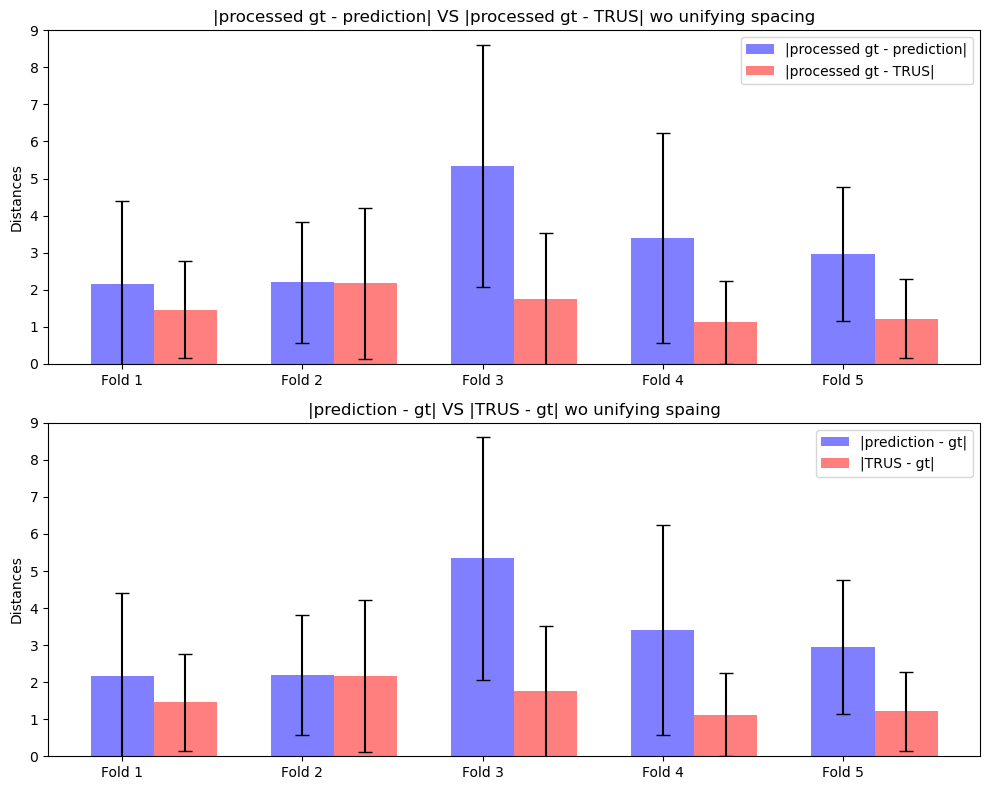

In [15]:
# 데이터 처리
mean_ab = []
std_ab = []
mean_bc = []
std_bc = []
mean_ad = []
std_ad = []
mean_dc = []
std_dc = []

# Fold 수
num_folds = len(a_lists)

# fold별로 |a-b|와 |b-c| 계산
for fold_idx, (a_values, b_values, c_values) in enumerate(zip(a_lists, b_lists, c_lists), start=1):
    abs_diff_ab_fold = np.abs(np.array(a_values) - np.array(b_values))
    abs_diff_bc_fold = np.abs(np.array(b_values) - np.array(c_values))
    
    mean_ab_fold = np.mean(abs_diff_ab_fold)
    std_ab_fold = np.std(abs_diff_ab_fold)
    mean_bc_fold = np.mean(abs_diff_bc_fold)
    std_bc_fold = np.std(abs_diff_bc_fold)
    mean_ab.append(mean_ab_fold)
    std_ab.append(std_ab_fold)
    mean_bc.append(mean_bc_fold)
    std_bc.append(std_bc_fold)
    
    print(f"Fold {fold_idx}:")
    print(f"|processed gt - prediction| 평균: {mean_ab_fold}")
    print(f"|processed gt - prediction| 표준편차: {std_ab_fold}")
    print(f"|prediction - gt| 평균: {mean_bc_fold}")
    print(f"|prediction - gt| 표준편차: {std_bc_fold}")
    print()

# fold별로 |a-d|와 |d-c| 계산 : fold마다 validation에 사용된 데이터가 다를거라서
for fold_idx, (a_values, d_values, c_values) in enumerate(zip(a_lists, d_lists, c_lists), start=1):
    abs_diff_ad_fold = np.abs(np.array(a_values) - np.array(d_values))
    abs_diff_dc_fold = np.abs(np.array(d_values) - np.array(c_values))
    
    mean_ad_fold = np.mean(abs_diff_ad_fold)
    std_ad_fold = np.std(abs_diff_ad_fold)
    mean_dc_fold = np.mean(abs_diff_dc_fold)
    std_dc_fold = np.std(abs_diff_dc_fold)
    mean_ad.append(mean_ad_fold)
    std_ad.append(std_ad_fold)
    mean_dc.append(mean_dc_fold)
    std_dc.append(std_dc_fold)
    
    print(f"Fold {fold_idx}:")
    print(f"|processed gt - TRUS| 평균: {mean_ad_fold}")
    print(f"|processed gt - TRUS| 표준편차: {std_ad_fold}")
    print(f"|TRUS - gt| 평균: {mean_dc_fold}")
    print(f"|TRUS - gt| 표준편차: {std_dc_fold}")
    print()
    
# Fold별 바 차트 그리기
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
bar_width = 0.35

# 첫 번째 plot
axes[0].bar(range(1, num_folds + 1), mean_ab, bar_width, yerr=std_ab, color='b', alpha=0.5, capsize=5, label='|processed gt - prediction|')
axes[0].bar([x + bar_width for x in range(1, num_folds + 1)], mean_ad, bar_width, color='r', yerr=std_ad, alpha=0.5, capsize=5, label='|processed gt - TRUS|')
axes[0].set_xticks(range(1, num_folds + 1))
axes[0].set_xticklabels([f'Fold {i}' for i in range(1, num_folds + 1)])
axes[0].set_ylabel('Distances')
axes[0].set_title('|processed gt - prediction| VS |processed gt - TRUS| wo unifying spacing')
axes[0].set_ylim([0,9])
axes[0].legend()

# 두 번째 plot
axes[1].bar(range(1, num_folds + 1), mean_bc, bar_width, yerr=std_bc, color='b', alpha=0.5, capsize=5, label='|prediction - gt|')
axes[1].bar([x + bar_width for x in range(1, num_folds + 1)], mean_dc, bar_width, yerr=std_dc, color='r', alpha=0.5, capsize=5, label='|TRUS - gt|')
axes[1].set_xticks(range(1, num_folds + 1))
axes[1].set_xticklabels([f'Fold {i}' for i in range(1, num_folds + 1)])
axes[1].set_ylabel('Distances')
axes[1].set_title('|prediction - gt| VS |TRUS - gt| wo unifying spaing')
axes[1].set_ylim([0,9])
axes[1].legend()

plt.tight_layout()
plt.show()

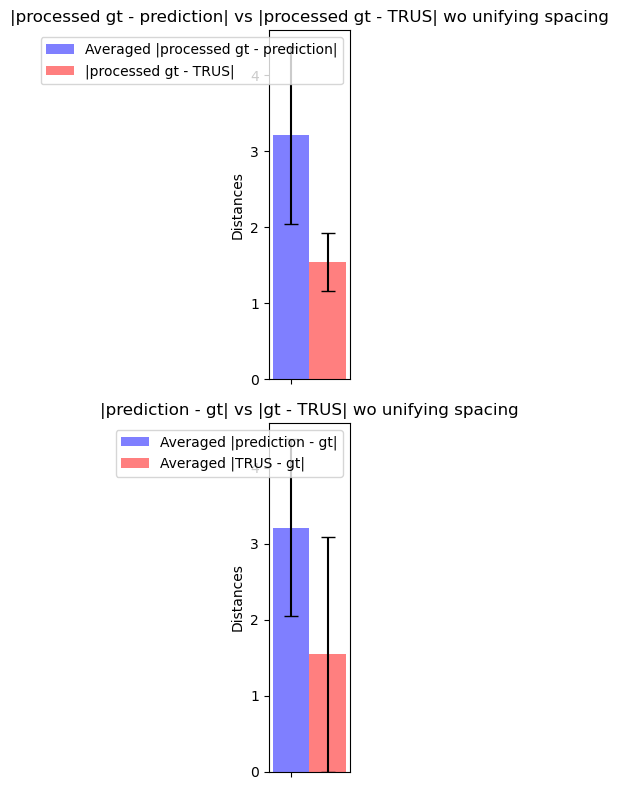

In [16]:
fig, axes = plt.subplots(2, 1, figsize=(4, 8))
bar_width = 0.35

# 첫 번째 plot
axes[0].bar([1], [np.mean(mean_ab)], bar_width, yerr=[np.std(mean_ab)], color='b', alpha=0.5, capsize=5, label='Averaged |processed gt - prediction|')
axes[0].bar([1 + bar_width], [np.mean(mean_ad)], bar_width, color='r', yerr=[np.std(mean_ad)], alpha=0.5, capsize=5, label='|processed gt - TRUS|')
axes[0].set_xticks([1])
axes[0].set_xticklabels([''])
axes[0].set_ylabel('Distances')
axes[0].set_title('|processed gt - prediction| vs |processed gt - TRUS| wo unifying spacing')
axes[0].legend()

# 두 번째 plot
axes[1].bar([1], [np.mean(mean_bc)], bar_width, yerr=[np.std(mean_bc)], color='b', alpha=0.5, capsize=5, label='Averaged |prediction - gt|')
axes[1].bar([1 + bar_width], [np.mean(mean_dc)], bar_width, yerr=[np.mean(mean_dc)], color='r', alpha=0.5, capsize=5, label='Averaged |TRUS - gt|')
axes[1].set_xticks([1])
axes[1].set_xticklabels([''])
axes[1].set_ylabel('Distances')
axes[1].set_title('|prediction - gt| vs |gt - TRUS| wo unifying spacing')
axes[1].legend()

plt.tight_layout()
plt.show()

### Fold별 각각의 train set prediction에 대한 volume 추정

In [17]:
# import os
# import numpy as np

# 디렉토리 경로 설정
base_directory = '/data/hanyang_Prostate/Prostate/prostate_1c_test_result/test_230922_w_spacing/'
directory_paths = [os.path.join(base_directory, f'unet_10000_30000_fold{i}/training/') for i in range(1, 6)]
directory_path_realgt = '/data/hanyang_Prostate/50_example/original/1_50_trim_20230130/Total volume/'

# 초기화할 리스트
a_lists = [[] for _ in range(5)]  # 각 폴드의 volume_gt 리스트
b_lists = [[] for _ in range(5)]  # 각 폴드의 volume_pred 리스트
c_lists = [[] for _ in range(5)]  # 각 폴드의 volume_realgt 리스트
d_lists = [[] for _ in range(5)]  # 각 폴드의 volume_TRUS 리스트
cnt = 0
# 디렉토리별로 처리
for fold_idx, directory_path in enumerate(directory_paths, start=1):
    print("Directory: ", directory_path)
    # 디렉토리 내의 모든 파일 검색
    for filename in os.listdir(directory_path):
        # 파일 이름이 "_gt.nii.gz"로 끝나는 경우에만 처리
        if filename.endswith('_gt.nii.gz'):
            # 파일의 전체 경로 생성
            gt_file_path = os.path.join(directory_path, filename)
            
            # 해당 _gt 파일과 동일한 이름 구조를 가진 _pred 파일 찾기
            pred_filename = filename.replace('_gt.nii.gz', '_pred.nii.gz')
            pred_file_path = os.path.join(directory_path, pred_filename)
    
            # _pred 파일이 존재하면 계산 수행
            if os.path.exists(pred_file_path):
                # _gt 파일의 정보를 읽어오고 volume 계산
                mask_voxel_count_gt, pixel_spacing_x_gt, pixel_spacing_y_gt, slice_gap_gt = read_nifti_spacing_and_mask_count(gt_file_path)
                volume_gt = calculate_volume(mask_voxel_count_gt, pixel_spacing_x_gt, pixel_spacing_y_gt, slice_gap_gt)
                
                # _pred 파일의 정보를 읽어오고 volume 계산
                mask_voxel_count_pred, pixel_spacing_x_pred, pixel_spacing_y_pred, slice_gap_pred = read_nifti_spacing_and_mask_count(pred_file_path)
                volume_pred = calculate_volume(mask_voxel_count_pred, pixel_spacing_x_pred, pixel_spacing_y_pred, slice_gap_pred)
                
                # 검색할 문자열 설정
                a_value = filename.split("_")[1]
    
                # /data/hanyang_Prostate/50_example/original/1_50_trim_20230130/Total volume/ 디렉토리 내의 파일 검색
                for realgt_filename in os.listdir(directory_path_realgt):
                    # 파일 이름에 검색할 문자열이 포함되어 있는지 확인
                    if a_value in realgt_filename:
                        mask_voxel_count_realgt, pixel_spacing_x_realgt, pixel_spacing_y_realgt, slice_gap_realgt = read_nifti_spacing_and_mask_count(os.path.join(directory_path_realgt, realgt_filename))
                        volume_realgt = calculate_volume(mask_voxel_count_realgt, pixel_spacing_x_realgt, pixel_spacing_y_realgt, slice_gap_realgt)
                        
                        # 값 저장
                        if a_value in TRUS:
                            cnt += 1
                            a_lists[fold_idx - 1].append(volume_gt)
                            b_lists[fold_idx - 1].append(volume_pred)
                            c_lists[fold_idx - 1].append(volume_realgt)
                            d_lists[fold_idx - 1].append(TRUS[a_value])
                            # 출력
                            print(f"No.: {a_value}")
                            print(f"\t Volume (TRUS): {TRUS[a_value]}")
                            print(f"\t Pixel Spacing X (realgt): {np.round(float(pixel_spacing_x_realgt),3)}")
                            print(f"\t Volume (realgt): {np.round(volume_realgt,1)}")
                            print(f"\t Pixel Spacing X (gt): {np.round(float(pixel_spacing_x_gt),3)}")
                            print(f"\t Volume (gt): {np.round(volume_gt,1)}")
                            print(f"\t Pixel Spacing X (pred): {np.round(float(pixel_spacing_x_pred),3)}")
                            print(f"\t Volume (pred): {np.round(volume_pred,1)}")
                            print("-----------------------------------------")
print(cnt)

Directory:  /data/hanyang_Prostate/Prostate/prostate_1c_test_result/test_230922_w_spacing/unet_10000_30000_fold1/training/
No.: 01776461
	 Volume (TRUS): 30.2
	 Pixel Spacing X (realgt): 0.782
	 Volume (realgt): 30.6
	 Pixel Spacing X (gt): 0.8
	 Volume (gt): 30.6
	 Pixel Spacing X (pred): 0.8
	 Volume (pred): 32.1
-----------------------------------------
No.: 01804929
	 Volume (TRUS): 20.0
	 Pixel Spacing X (realgt): 0.782
	 Volume (realgt): 18.3
	 Pixel Spacing X (gt): 0.8
	 Volume (gt): 18.6
	 Pixel Spacing X (pred): 0.8
	 Volume (pred): 19.2
-----------------------------------------
No.: 01904278
	 Volume (TRUS): 15.7
	 Pixel Spacing X (realgt): 0.824
	 Volume (realgt): 16.0
	 Pixel Spacing X (gt): 0.8
	 Volume (gt): 15.8
	 Pixel Spacing X (pred): 0.8
	 Volume (pred): 15.7
-----------------------------------------
No.: 01972333
	 Volume (TRUS): 25.0
	 Pixel Spacing X (realgt): 0.782
	 Volume (realgt): 23.9
	 Pixel Spacing X (gt): 0.8
	 Volume (gt): 23.6
	 Pixel Spacing X (pred): 0

No.: 02954361
	 Volume (TRUS): 23.38
	 Pixel Spacing X (realgt): 0.682
	 Volume (realgt): 20.8
	 Pixel Spacing X (gt): 0.8
	 Volume (gt): 20.8
	 Pixel Spacing X (pred): 0.8
	 Volume (pred): 21.5
-----------------------------------------
No.: 02954978
	 Volume (TRUS): 26.88
	 Pixel Spacing X (realgt): 0.82
	 Volume (realgt): 27.0
	 Pixel Spacing X (gt): 0.8
	 Volume (gt): 27.0
	 Pixel Spacing X (pred): 0.8
	 Volume (pred): 26.0
-----------------------------------------
No.: 02955289
	 Volume (TRUS): 18.1
	 Pixel Spacing X (realgt): 0.782
	 Volume (realgt): 18.1
	 Pixel Spacing X (gt): 0.8
	 Volume (gt): 17.9
	 Pixel Spacing X (pred): 0.8
	 Volume (pred): 15.3
-----------------------------------------
No.: 02955569
	 Volume (TRUS): 32.4
	 Pixel Spacing X (realgt): 0.782
	 Volume (realgt): 33.3
	 Pixel Spacing X (gt): 0.8
	 Volume (gt): 33.2
	 Pixel Spacing X (pred): 0.8
	 Volume (pred): 30.8
-----------------------------------------
Directory:  /data/hanyang_Prostate/Prostate/prostate_1c

No.: 02953540
	 Volume (TRUS): 28.1
	 Pixel Spacing X (realgt): 0.816
	 Volume (realgt): 27.1
	 Pixel Spacing X (gt): 0.8
	 Volume (gt): 27.0
	 Pixel Spacing X (pred): 0.8
	 Volume (pred): 26.8
-----------------------------------------
No.: 02953784
	 Volume (TRUS): 31.1
	 Pixel Spacing X (realgt): 0.782
	 Volume (realgt): 33.8
	 Pixel Spacing X (gt): 0.8
	 Volume (gt): 33.5
	 Pixel Spacing X (pred): 0.8
	 Volume (pred): 33.8
-----------------------------------------
No.: 02953958
	 Volume (TRUS): 29.0
	 Pixel Spacing X (realgt): 0.801
	 Volume (realgt): 26.5
	 Pixel Spacing X (gt): 0.8
	 Volume (gt): 26.4
	 Pixel Spacing X (pred): 0.8
	 Volume (pred): 25.1
-----------------------------------------
No.: 02954359
	 Volume (TRUS): 22.67
	 Pixel Spacing X (realgt): 0.782
	 Volume (realgt): 22.4
	 Pixel Spacing X (gt): 0.8
	 Volume (gt): 22.1
	 Pixel Spacing X (pred): 0.8
	 Volume (pred): 21.9
-----------------------------------------
No.: 02954360
	 Volume (TRUS): 27.98
	 Pixel Spacing X 

No.: 02949843
	 Volume (TRUS): 31.0
	 Pixel Spacing X (realgt): 0.782
	 Volume (realgt): 35.0
	 Pixel Spacing X (gt): 0.8
	 Volume (gt): 34.7
	 Pixel Spacing X (pred): 0.8
	 Volume (pred): 36.3
-----------------------------------------
No.: 02951189
	 Volume (TRUS): 25.3
	 Pixel Spacing X (realgt): 0.709
	 Volume (realgt): 26.7
	 Pixel Spacing X (gt): 0.8
	 Volume (gt): 26.9
	 Pixel Spacing X (pred): 0.8
	 Volume (pred): 26.9
-----------------------------------------
No.: 02951192
	 Volume (TRUS): 32.9
	 Pixel Spacing X (realgt): 0.831
	 Volume (realgt): 32.1
	 Pixel Spacing X (gt): 0.8
	 Volume (gt): 31.7
	 Pixel Spacing X (pred): 0.8
	 Volume (pred): 31.7
-----------------------------------------
No.: 02953538
	 Volume (TRUS): 37.9
	 Pixel Spacing X (realgt): 0.782
	 Volume (realgt): 35.9
	 Pixel Spacing X (gt): 0.8
	 Volume (gt): 35.5
	 Pixel Spacing X (pred): 0.8
	 Volume (pred): 37.3
-----------------------------------------
No.: 02953540
	 Volume (TRUS): 28.1
	 Pixel Spacing X (r

No.: 02286469
	 Volume (TRUS): 17.9
	 Pixel Spacing X (realgt): 0.782
	 Volume (realgt): 15.8
	 Pixel Spacing X (gt): 0.8
	 Volume (gt): 15.8
	 Pixel Spacing X (pred): 0.8
	 Volume (pred): 18.4
-----------------------------------------
No.: 02289873
	 Volume (TRUS): 32.8
	 Pixel Spacing X (realgt): 0.732
	 Volume (realgt): 31.7
	 Pixel Spacing X (gt): 0.8
	 Volume (gt): 31.6
	 Pixel Spacing X (pred): 0.8
	 Volume (pred): 32.0
-----------------------------------------
No.: 02348071
	 Volume (TRUS): 22.6
	 Pixel Spacing X (realgt): 0.816
	 Volume (realgt): 26.4
	 Pixel Spacing X (gt): 0.8
	 Volume (gt): 26.1
	 Pixel Spacing X (pred): 0.8
	 Volume (pred): 28.0
-----------------------------------------
No.: 02394910
	 Volume (TRUS): 49.1
	 Pixel Spacing X (realgt): 0.782
	 Volume (realgt): 54.6
	 Pixel Spacing X (gt): 0.8
	 Volume (gt): 54.5
	 Pixel Spacing X (pred): 0.8
	 Volume (pred): 57.1
-----------------------------------------
No.: 02572186
	 Volume (TRUS): 30.2
	 Pixel Spacing X (r

No.: 02153845
	 Volume (TRUS): 18.6
	 Pixel Spacing X (realgt): 0.782
	 Volume (realgt): 19.8
	 Pixel Spacing X (gt): 0.8
	 Volume (gt): 19.7
	 Pixel Spacing X (pred): 0.8
	 Volume (pred): 20.7
-----------------------------------------
No.: 02161060
	 Volume (TRUS): 21.6
	 Pixel Spacing X (realgt): 0.782
	 Volume (realgt): 22.0
	 Pixel Spacing X (gt): 0.8
	 Volume (gt): 21.6
	 Pixel Spacing X (pred): 0.8
	 Volume (pred): 20.8
-----------------------------------------
No.: 02179375
	 Volume (TRUS): 30.86
	 Pixel Spacing X (realgt): 0.782
	 Volume (realgt): 30.9
	 Pixel Spacing X (gt): 0.8
	 Volume (gt): 30.7
	 Pixel Spacing X (pred): 0.8
	 Volume (pred): 33.8
-----------------------------------------
No.: 02179650
	 Volume (TRUS): 19.0
	 Pixel Spacing X (realgt): 0.782
	 Volume (realgt): 19.3
	 Pixel Spacing X (gt): 0.8
	 Volume (gt): 19.5
	 Pixel Spacing X (pred): 0.8
	 Volume (pred): 21.7
-----------------------------------------
No.: 02286469
	 Volume (TRUS): 17.9
	 Pixel Spacing X (

Fold 1:
|processed gt - gt| 평균: 0.15953131610358512
|processed gt - gt| 표준편차: 0.12308261531279789
|processed gt - prediction| 평균: 1.0689378939390923
|processed gt - prediction| 표준편차: 0.9190852168106175
|prediction - gt| 평균: 1.0533074692632833
|prediction - gt| 표준편차: 0.8967447063486446

Fold 2:
|processed gt - gt| 평균: 0.15536256907745566
|processed gt - gt| 표준편차: 0.1332872911289144
|processed gt - prediction| 평균: 0.9327488416971221
|processed gt - prediction| 표준편차: 0.7128366768789811
|prediction - gt| 평균: 0.9590943214435989
|prediction - gt| 표준편차: 0.7104845993704509

Fold 3:
|processed gt - gt| 평균: 0.1511239741497139
|processed gt - gt| 표준편차: 0.1340480289280414
|processed gt - prediction| 평균: 0.9604332737039425
|processed gt - prediction| 표준편차: 1.0949128388083327
|prediction - gt| 평균: 0.8887941996893431
|prediction - gt| 표준편차: 1.120470818732634

Fold 4:
|processed gt - gt| 평균: 0.16434038861047193
|processed gt - gt| 표준편차: 0.13488960634248506
|processed gt - prediction| 평균: 2.58651908998

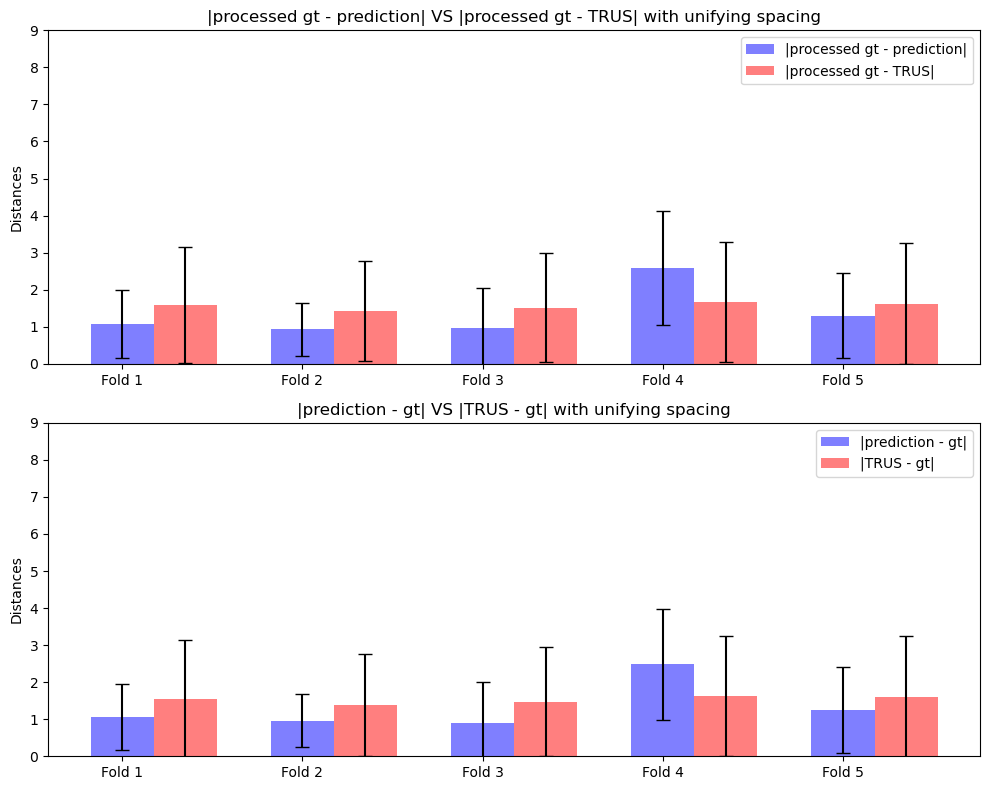

In [18]:
# 데이터 처리
mean_ac = []
std_ac = []

mean_ab = []
std_ab = []
mean_bc = []
std_bc = []
mean_ad = []
std_ad = []
mean_dc = []
std_dc = []

# Fold 수
num_folds = len(a_lists)

# fold별로 |a-b|와 |b-c| 계산
for fold_idx, (a_values, b_values, c_values) in enumerate(zip(a_lists, b_lists, c_lists), start=1):
    abs_diff_ac_fold = np.abs(np.array(a_values) - np.array(c_values))
    abs_diff_ab_fold = np.abs(np.array(a_values) - np.array(b_values))
    abs_diff_bc_fold = np.abs(np.array(b_values) - np.array(c_values))
    
    mean_ac_fold = np.mean(abs_diff_ac_fold)
    std_ac_fold = np.std(abs_diff_ac_fold)
    mean_ab_fold = np.mean(abs_diff_ab_fold)
    std_ab_fold = np.std(abs_diff_ab_fold)
    mean_bc_fold = np.mean(abs_diff_bc_fold)
    std_bc_fold = np.std(abs_diff_bc_fold)
    mean_ab.append(mean_ab_fold)
    std_ab.append(std_ab_fold)
    mean_bc.append(mean_bc_fold)
    std_bc.append(std_bc_fold)
    
    print(f"Fold {fold_idx}:")
    print(f"|processed gt - gt| 평균: {mean_ac_fold}")
    print(f"|processed gt - gt| 표준편차: {std_ac_fold}")
    print(f"|processed gt - prediction| 평균: {mean_ab_fold}")
    print(f"|processed gt - prediction| 표준편차: {std_ab_fold}")
    print(f"|prediction - gt| 평균: {mean_bc_fold}")
    print(f"|prediction - gt| 표준편차: {std_bc_fold}")
    print()

# fold별로 |a-d|와 |d-c| 계산 : fold마다 validation에 사용된 데이터가 다를거라서
for fold_idx, (a_values, d_values, c_values) in enumerate(zip(a_lists, d_lists, c_lists), start=1):
    abs_diff_ad_fold = np.abs(np.array(a_values) - np.array(d_values))
    abs_diff_dc_fold = np.abs(np.array(d_values) - np.array(c_values))
    
    mean_ad_fold = np.mean(abs_diff_ad_fold)
    std_ad_fold = np.std(abs_diff_ad_fold)
    mean_dc_fold = np.mean(abs_diff_dc_fold)
    std_dc_fold = np.std(abs_diff_dc_fold)
    mean_ad.append(mean_ad_fold)
    std_ad.append(std_ad_fold)
    mean_dc.append(mean_dc_fold)
    std_dc.append(std_dc_fold)
    
    print(f"Fold {fold_idx}:")
    print(f"|processed gt - TRUS| 평균: {mean_ad_fold}")
    print(f"|processed gt - TRUS| 표준편차: {std_ad_fold}")
    print(f"|TRUS - gt| 평균: {mean_dc_fold}")
    print(f"|TRUS - gt| 표준편차: {std_dc_fold}")
    print()
    
# Fold별 바 차트 그리기
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
bar_width = 0.35

# 첫 번째 plot
axes[0].bar(range(1, num_folds + 1), mean_ab, bar_width, yerr=std_ab, color='b', alpha=0.5, capsize=5, label='|processed gt - prediction|')
axes[0].bar([x + bar_width for x in range(1, num_folds + 1)], mean_ad, bar_width, color='r', yerr=std_ad, alpha=0.5, capsize=5, label='|processed gt - TRUS|')
axes[0].set_xticks(range(1, num_folds + 1))
axes[0].set_xticklabels([f'Fold {i}' for i in range(1, num_folds + 1)])
axes[0].set_ylabel('Distances')
axes[0].set_title('|processed gt - prediction| VS |processed gt - TRUS| with unifying spacing')
axes[0].set_ylim([0,9])
axes[0].legend()

# 두 번째 plot
axes[1].bar(range(1, num_folds + 1), mean_bc, bar_width, yerr=std_bc, color='b', alpha=0.5, capsize=5, label='|prediction - gt|')
axes[1].bar([x + bar_width for x in range(1, num_folds + 1)], mean_dc, bar_width, yerr=std_dc, color='r', alpha=0.5, capsize=5, label='|TRUS - gt|')
axes[1].set_xticks(range(1, num_folds + 1))
axes[1].set_xticklabels([f'Fold {i}' for i in range(1, num_folds + 1)])
axes[1].set_ylabel('Distances')
axes[1].set_title('|prediction - gt| VS |TRUS - gt| with unifying spacing')
axes[1].set_ylim([0,9])
axes[1].legend()

plt.tight_layout()
plt.show()

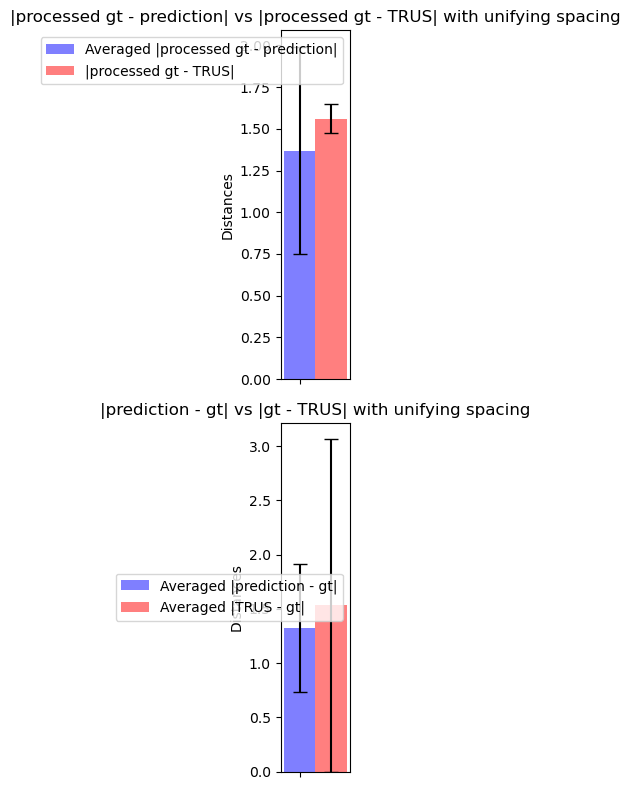

In [19]:
fig, axes = plt.subplots(2, 1, figsize=(4, 8))
bar_width = 0.35

# 첫 번째 plot
axes[0].bar([1], [np.mean(mean_ab)], bar_width, yerr=[np.std(mean_ab)], color='b', alpha=0.5, capsize=5, label='Averaged |processed gt - prediction|')
axes[0].bar([1 + bar_width], [np.mean(mean_ad)], bar_width, color='r', yerr=[np.std(mean_ad)], alpha=0.5, capsize=5, label='|processed gt - TRUS|')
axes[0].set_xticks([1])
axes[0].set_xticklabels([''])
axes[0].set_ylabel('Distances')
axes[0].set_title('|processed gt - prediction| vs |processed gt - TRUS| with unifying spacing')
axes[0].legend()

# 두 번째 plot
axes[1].bar([1], [np.mean(mean_bc)], bar_width, yerr=[np.std(mean_bc)], color='b', alpha=0.5, capsize=5, label='Averaged |prediction - gt|')
axes[1].bar([1 + bar_width], [np.mean(mean_dc)], bar_width, yerr=[np.mean(mean_dc)], color='r', alpha=0.5, capsize=5, label='Averaged |TRUS - gt|')
axes[1].set_xticks([1])
axes[1].set_xticklabels([''])
axes[1].set_ylabel('Distances')
axes[1].set_title('|prediction - gt| vs |gt - TRUS| with unifying spacing')
axes[1].legend()

plt.tight_layout()
plt.show()

In [20]:
# import os
# import numpy as np

# 디렉토리 경로 설정
base_directory = '/data/hanyang_Prostate/Prostate/prostate_1c_test_result/test_230922_wo_spacing/'
directory_paths = [os.path.join(base_directory, f'vnet_30000_fold{i}/training/') for i in range(1, 6)]
directory_path_realgt = '/data/hanyang_Prostate/50_example/original/1_50_trim_20230130/Total volume/'

# 초기화할 리스트
a_lists = [[] for _ in range(5)]  # 각 폴드의 volume_gt 리스트
b_lists = [[] for _ in range(5)]  # 각 폴드의 volume_pred 리스트
c_lists = [[] for _ in range(5)]  # 각 폴드의 volume_realgt 리스트
d_lists = [[] for _ in range(5)]  # 각 폴드의 volume_TRUS 리스트
cnt = 0
# 디렉토리별로 처리
for fold_idx, directory_path in enumerate(directory_paths, start=1):
    print("Directory: ", directory_path)
    # 디렉토리 내의 모든 파일 검색
    for filename in os.listdir(directory_path):
        # 파일 이름이 "_gt.nii.gz"로 끝나는 경우에만 처리
        if filename.endswith('_gt.nii.gz'):
            # 파일의 전체 경로 생성
            gt_file_path = os.path.join(directory_path, filename)
            
            # 해당 _gt 파일과 동일한 이름 구조를 가진 _pred 파일 찾기
            pred_filename = filename.replace('_gt.nii.gz', '_pred.nii.gz')
            pred_file_path = os.path.join(directory_path, pred_filename)
    
            # _pred 파일이 존재하면 계산 수행
            if os.path.exists(pred_file_path):
                # _gt 파일의 정보를 읽어오고 volume 계산
                mask_voxel_count_gt, pixel_spacing_x_gt, pixel_spacing_y_gt, slice_gap_gt = read_nifti_spacing_and_mask_count(gt_file_path)
                volume_gt = calculate_volume(mask_voxel_count_gt, pixel_spacing_x_gt, pixel_spacing_y_gt, slice_gap_gt)
                
                # _pred 파일의 정보를 읽어오고 volume 계산
                mask_voxel_count_pred, pixel_spacing_x_pred, pixel_spacing_y_pred, slice_gap_pred = read_nifti_spacing_and_mask_count(pred_file_path)
                volume_pred = calculate_volume(mask_voxel_count_pred, pixel_spacing_x_pred, pixel_spacing_y_pred, slice_gap_pred)
                
                # 검색할 문자열 설정
                a_value = filename.split("_")[1]
    
                # /data/hanyang_Prostate/50_example/original/1_50_trim_20230130/Total volume/ 디렉토리 내의 파일 검색
                for realgt_filename in os.listdir(directory_path_realgt):
                    # 파일 이름에 검색할 문자열이 포함되어 있는지 확인
                    if a_value in realgt_filename:
                        mask_voxel_count_realgt, pixel_spacing_x_realgt, pixel_spacing_y_realgt, slice_gap_realgt = read_nifti_spacing_and_mask_count(os.path.join(directory_path_realgt, realgt_filename))
                        volume_realgt = calculate_volume(mask_voxel_count_realgt, pixel_spacing_x_realgt, pixel_spacing_y_realgt, slice_gap_realgt)
                        
                        # 값 저장
                        if a_value in TRUS:
                            cnt += 1
                            a_lists[fold_idx - 1].append(volume_gt)
                            b_lists[fold_idx - 1].append(volume_pred)
                            c_lists[fold_idx - 1].append(volume_realgt)
                            d_lists[fold_idx - 1].append(TRUS[a_value])
                            # 출력
                            print(f"No.: {a_value}")
                            print(f"\t Volume (TRUS): {TRUS[a_value]}")
                            print(f"\t Pixel Spacing X (realgt): {np.round(float(pixel_spacing_x_realgt),3)}")
                            print(f"\t Volume (realgt): {np.round(volume_realgt,1)}")
                            print(f"\t Pixel Spacing X (gt): {np.round(float(pixel_spacing_x_gt),3)}")
                            print(f"\t Volume (gt): {np.round(volume_gt,1)}")
                            print(f"\t Pixel Spacing X (pred): {np.round(float(pixel_spacing_x_pred),3)}")
                            print(f"\t Volume (pred): {np.round(volume_pred,1)}")
                            print("-----------------------------------------")
print(cnt)

Directory:  /data/hanyang_Prostate/Prostate/prostate_1c_test_result/test_230922_wo_spacing/vnet_30000_fold1/training/
No.: 01776461
	 Volume (TRUS): 30.2
	 Pixel Spacing X (realgt): 0.782
	 Volume (realgt): 30.6
	 Pixel Spacing X (gt): 0.782
	 Volume (gt): 30.6
	 Pixel Spacing X (pred): 0.782
	 Volume (pred): 31.4
-----------------------------------------
No.: 01804929
	 Volume (TRUS): 20.0
	 Pixel Spacing X (realgt): 0.782
	 Volume (realgt): 18.3
	 Pixel Spacing X (gt): 0.782
	 Volume (gt): 18.3
	 Pixel Spacing X (pred): 0.782
	 Volume (pred): 22.4
-----------------------------------------
No.: 01904278
	 Volume (TRUS): 15.7
	 Pixel Spacing X (realgt): 0.824
	 Volume (realgt): 16.0
	 Pixel Spacing X (gt): 0.824
	 Volume (gt): 16.0
	 Pixel Spacing X (pred): 0.824
	 Volume (pred): 17.7
-----------------------------------------
No.: 01972333
	 Volume (TRUS): 25.0
	 Pixel Spacing X (realgt): 0.782
	 Volume (realgt): 23.9
	 Pixel Spacing X (gt): 0.782
	 Volume (gt): 23.9
	 Pixel Spacing X 

No.: 02954360
	 Volume (TRUS): 27.98
	 Pixel Spacing X (realgt): 0.835
	 Volume (realgt): 28.1
	 Pixel Spacing X (gt): 0.835
	 Volume (gt): 28.1
	 Pixel Spacing X (pred): 0.835
	 Volume (pred): 31.5
-----------------------------------------
No.: 02954361
	 Volume (TRUS): 23.38
	 Pixel Spacing X (realgt): 0.682
	 Volume (realgt): 20.8
	 Pixel Spacing X (gt): 0.682
	 Volume (gt): 20.8
	 Pixel Spacing X (pred): 0.682
	 Volume (pred): 21.3
-----------------------------------------
No.: 02954978
	 Volume (TRUS): 26.88
	 Pixel Spacing X (realgt): 0.82
	 Volume (realgt): 27.0
	 Pixel Spacing X (gt): 0.82
	 Volume (gt): 27.0
	 Pixel Spacing X (pred): 0.82
	 Volume (pred): 26.9
-----------------------------------------
No.: 02955289
	 Volume (TRUS): 18.1
	 Pixel Spacing X (realgt): 0.782
	 Volume (realgt): 18.1
	 Pixel Spacing X (gt): 0.782
	 Volume (gt): 18.1
	 Pixel Spacing X (pred): 0.782
	 Volume (pred): 19.7
-----------------------------------------
No.: 02955569
	 Volume (TRUS): 32.4
	 Pi

No.: 02951192
	 Volume (TRUS): 32.9
	 Pixel Spacing X (realgt): 0.831
	 Volume (realgt): 32.1
	 Pixel Spacing X (gt): 0.831
	 Volume (gt): 32.1
	 Pixel Spacing X (pred): 0.831
	 Volume (pred): 29.5
-----------------------------------------
No.: 02953538
	 Volume (TRUS): 37.9
	 Pixel Spacing X (realgt): 0.782
	 Volume (realgt): 35.9
	 Pixel Spacing X (gt): 0.782
	 Volume (gt): 35.9
	 Pixel Spacing X (pred): 0.782
	 Volume (pred): 35.5
-----------------------------------------
No.: 02953540
	 Volume (TRUS): 28.1
	 Pixel Spacing X (realgt): 0.816
	 Volume (realgt): 27.1
	 Pixel Spacing X (gt): 0.816
	 Volume (gt): 27.1
	 Pixel Spacing X (pred): 0.816
	 Volume (pred): 26.1
-----------------------------------------
No.: 02953784
	 Volume (TRUS): 31.1
	 Pixel Spacing X (realgt): 0.782
	 Volume (realgt): 33.8
	 Pixel Spacing X (gt): 0.782
	 Volume (gt): 33.8
	 Pixel Spacing X (pred): 0.782
	 Volume (pred): 32.9
-----------------------------------------
No.: 02953958
	 Volume (TRUS): 29.0
	 Pi

No.: 02820034
	 Volume (TRUS): 21.6
	 Pixel Spacing X (realgt): 0.717
	 Volume (realgt): 20.5
	 Pixel Spacing X (gt): 0.717
	 Volume (gt): 20.5
	 Pixel Spacing X (pred): 0.717
	 Volume (pred): 21.5
-----------------------------------------
No.: 02882776
	 Volume (TRUS): 19.2
	 Pixel Spacing X (realgt): 0.74
	 Volume (realgt): 19.2
	 Pixel Spacing X (gt): 0.74
	 Volume (gt): 19.2
	 Pixel Spacing X (pred): 0.74
	 Volume (pred): 19.8
-----------------------------------------
No.: 02948957
	 Volume (TRUS): 43.18
	 Pixel Spacing X (realgt): 0.74
	 Volume (realgt): 43.8
	 Pixel Spacing X (gt): 0.74
	 Volume (gt): 43.8
	 Pixel Spacing X (pred): 0.74
	 Volume (pred): 45.4
-----------------------------------------
No.: 02949843
	 Volume (TRUS): 31.0
	 Pixel Spacing X (realgt): 0.782
	 Volume (realgt): 35.0
	 Pixel Spacing X (gt): 0.782
	 Volume (gt): 35.0
	 Pixel Spacing X (pred): 0.782
	 Volume (pred): 35.4
-----------------------------------------
No.: 02951189
	 Volume (TRUS): 25.3
	 Pixel S

No.: 02153845
	 Volume (TRUS): 18.6
	 Pixel Spacing X (realgt): 0.782
	 Volume (realgt): 19.8
	 Pixel Spacing X (gt): 0.782
	 Volume (gt): 19.8
	 Pixel Spacing X (pred): 0.782
	 Volume (pred): 22.0
-----------------------------------------
No.: 02161060
	 Volume (TRUS): 21.6
	 Pixel Spacing X (realgt): 0.782
	 Volume (realgt): 22.0
	 Pixel Spacing X (gt): 0.782
	 Volume (gt): 22.0
	 Pixel Spacing X (pred): 0.782
	 Volume (pred): 23.2
-----------------------------------------
No.: 02179375
	 Volume (TRUS): 30.86
	 Pixel Spacing X (realgt): 0.782
	 Volume (realgt): 30.9
	 Pixel Spacing X (gt): 0.782
	 Volume (gt): 30.9
	 Pixel Spacing X (pred): 0.782
	 Volume (pred): 33.5
-----------------------------------------
No.: 02179650
	 Volume (TRUS): 19.0
	 Pixel Spacing X (realgt): 0.782
	 Volume (realgt): 19.3
	 Pixel Spacing X (gt): 0.782
	 Volume (gt): 19.3
	 Pixel Spacing X (pred): 0.782
	 Volume (pred): 24.1
-----------------------------------------
No.: 02286469
	 Volume (TRUS): 17.9
	 P

No.: 01972333
	 Volume (TRUS): 25.0
	 Pixel Spacing X (realgt): 0.782
	 Volume (realgt): 23.9
	 Pixel Spacing X (gt): 0.782
	 Volume (gt): 23.9
	 Pixel Spacing X (pred): 0.782
	 Volume (pred): 23.4
-----------------------------------------
No.: 01986175
	 Volume (TRUS): 30.6
	 Pixel Spacing X (realgt): 0.782
	 Volume (realgt): 28.2
	 Pixel Spacing X (gt): 0.782
	 Volume (gt): 28.2
	 Pixel Spacing X (pred): 0.782
	 Volume (pred): 29.4
-----------------------------------------
No.: 02063805
	 Volume (TRUS): 33.3
	 Pixel Spacing X (realgt): 0.782
	 Volume (realgt): 32.4
	 Pixel Spacing X (gt): 0.782
	 Volume (gt): 32.4
	 Pixel Spacing X (pred): 0.782
	 Volume (pred): 31.7
-----------------------------------------
No.: 02141859
	 Volume (TRUS): 37.2
	 Pixel Spacing X (realgt): 0.782
	 Volume (realgt): 30.7
	 Pixel Spacing X (gt): 0.782
	 Volume (gt): 30.7
	 Pixel Spacing X (pred): 0.782
	 Volume (pred): 29.2
-----------------------------------------
No.: 02150142
	 Volume (TRUS): 26.5
	 Pi

Fold 1:
|processed gt - prediction| 평균: 1.717953360894292
|processed gt - prediction| 표준편차: 1.3014447069289472
|prediction - gt| 평균: 1.717953288264844
|prediction - gt| 표준편차: 1.3014444393281572

Fold 2:
|processed gt - prediction| 평균: 1.1627040831813305
|processed gt - prediction| 표준편차: 0.7696061308916236
|prediction - gt| 평균: 1.1627048779088969
|prediction - gt| 표준편차: 0.7696062708287628

Fold 3:
|processed gt - prediction| 평균: 1.4245839595156353
|processed gt - prediction| 표준편차: 1.411649639982678
|prediction - gt| 평균: 1.4245841148022085
|prediction - gt| 표준편차: 1.4116496442240754

Fold 4:
|processed gt - prediction| 평균: 2.355499455786618
|processed gt - prediction| 표준편차: 1.8024934734138132
|prediction - gt| 평균: 2.355499374305953
|prediction - gt| 표준편차: 1.8024934114238642

Fold 5:
|processed gt - prediction| 평균: 0.9800818865424964
|processed gt - prediction| 표준편차: 0.7881773882125076
|prediction - gt| 평균: 0.9800822230573445
|prediction - gt| 표준편차: 0.7881775534934063

Fold 1:
|processed g

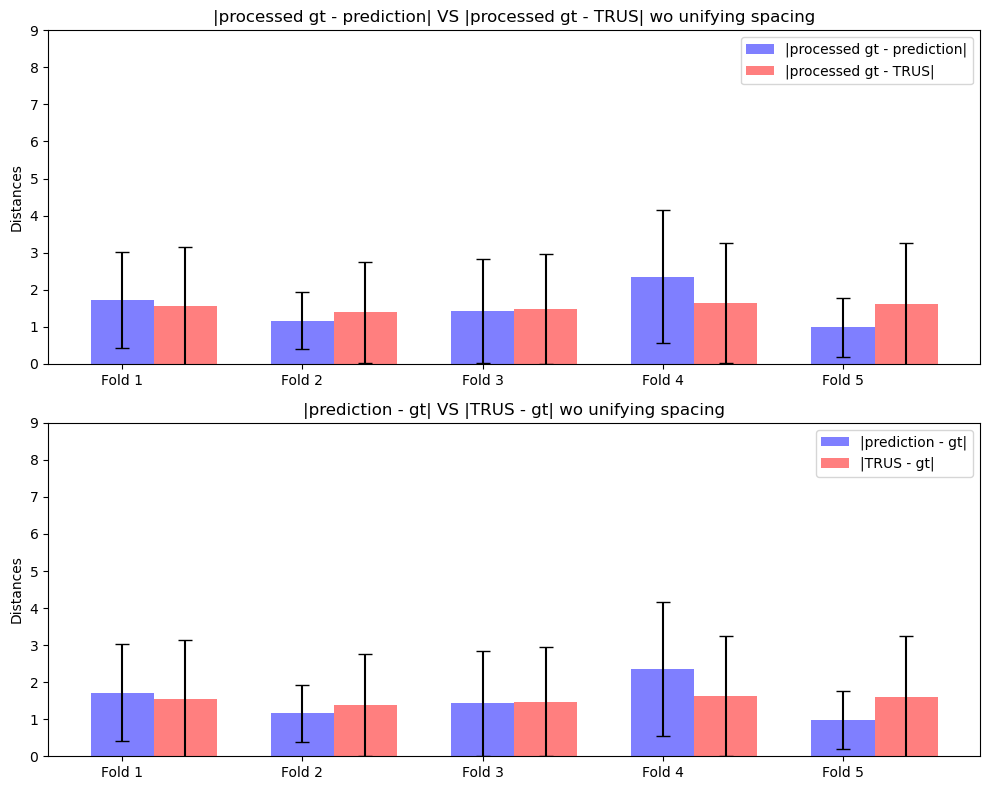

In [21]:
# 데이터 처리
mean_ab = []
std_ab = []
mean_bc = []
std_bc = []
mean_ad = []
std_ad = []
mean_dc = []
std_dc = []

# Fold 수
num_folds = len(a_lists)

# fold별로 |a-b|와 |b-c| 계산
for fold_idx, (a_values, b_values, c_values) in enumerate(zip(a_lists, b_lists, c_lists), start=1):
    abs_diff_ab_fold = np.abs(np.array(a_values) - np.array(b_values))
    abs_diff_bc_fold = np.abs(np.array(b_values) - np.array(c_values))
    
    mean_ab_fold = np.mean(abs_diff_ab_fold)
    std_ab_fold = np.std(abs_diff_ab_fold)
    mean_bc_fold = np.mean(abs_diff_bc_fold)
    std_bc_fold = np.std(abs_diff_bc_fold)
    mean_ab.append(mean_ab_fold)
    std_ab.append(std_ab_fold)
    mean_bc.append(mean_bc_fold)
    std_bc.append(std_bc_fold)
    
    print(f"Fold {fold_idx}:")
    print(f"|processed gt - prediction| 평균: {mean_ab_fold}")
    print(f"|processed gt - prediction| 표준편차: {std_ab_fold}")
    print(f"|prediction - gt| 평균: {mean_bc_fold}")
    print(f"|prediction - gt| 표준편차: {std_bc_fold}")
    print()

# fold별로 |a-d|와 |d-c| 계산 : fold마다 validation에 사용된 데이터가 다를거라서
for fold_idx, (a_values, d_values, c_values) in enumerate(zip(a_lists, d_lists, c_lists), start=1):
    abs_diff_ad_fold = np.abs(np.array(a_values) - np.array(d_values))
    abs_diff_dc_fold = np.abs(np.array(d_values) - np.array(c_values))
    
    mean_ad_fold = np.mean(abs_diff_ad_fold)
    std_ad_fold = np.std(abs_diff_ad_fold)
    mean_dc_fold = np.mean(abs_diff_dc_fold)
    std_dc_fold = np.std(abs_diff_dc_fold)
    mean_ad.append(mean_ad_fold)
    std_ad.append(std_ad_fold)
    mean_dc.append(mean_dc_fold)
    std_dc.append(std_dc_fold)
    
    print(f"Fold {fold_idx}:")
    print(f"|processed gt - TRUS| 평균: {mean_ad_fold}")
    print(f"|processed gt - TRUS| 표준편차: {std_ad_fold}")
    print(f"|TRUS - gt| 평균: {mean_dc_fold}")
    print(f"|TRUS - gt| 표준편차: {std_dc_fold}")
    print()
    
# Fold별 바 차트 그리기
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
bar_width = 0.35

# 첫 번째 plot
axes[0].bar(range(1, num_folds + 1), mean_ab, bar_width, yerr=std_ab, color='b', alpha=0.5, capsize=5, label='|processed gt - prediction|')
axes[0].bar([x + bar_width for x in range(1, num_folds + 1)], mean_ad, bar_width, color='r', yerr=std_ad, alpha=0.5, capsize=5, label='|processed gt - TRUS|')
axes[0].set_xticks(range(1, num_folds + 1))
axes[0].set_xticklabels([f'Fold {i}' for i in range(1, num_folds + 1)])
axes[0].set_ylabel('Distances')
axes[0].set_title('|processed gt - prediction| VS |processed gt - TRUS| wo unifying spacing')
axes[0].set_ylim([0,9])
axes[0].legend()

# 두 번째 plot
axes[1].bar(range(1, num_folds + 1), mean_bc, bar_width, yerr=std_bc, color='b', alpha=0.5, capsize=5, label='|prediction - gt|')
axes[1].bar([x + bar_width for x in range(1, num_folds + 1)], mean_dc, bar_width, yerr=std_dc, color='r', alpha=0.5, capsize=5, label='|TRUS - gt|')
axes[1].set_xticks(range(1, num_folds + 1))
axes[1].set_xticklabels([f'Fold {i}' for i in range(1, num_folds + 1)])
axes[1].set_ylabel('Distances')
axes[1].set_title('|prediction - gt| VS |TRUS - gt| wo unifying spacing')
axes[1].set_ylim([0,9])
axes[1].legend()

plt.tight_layout()
plt.show()

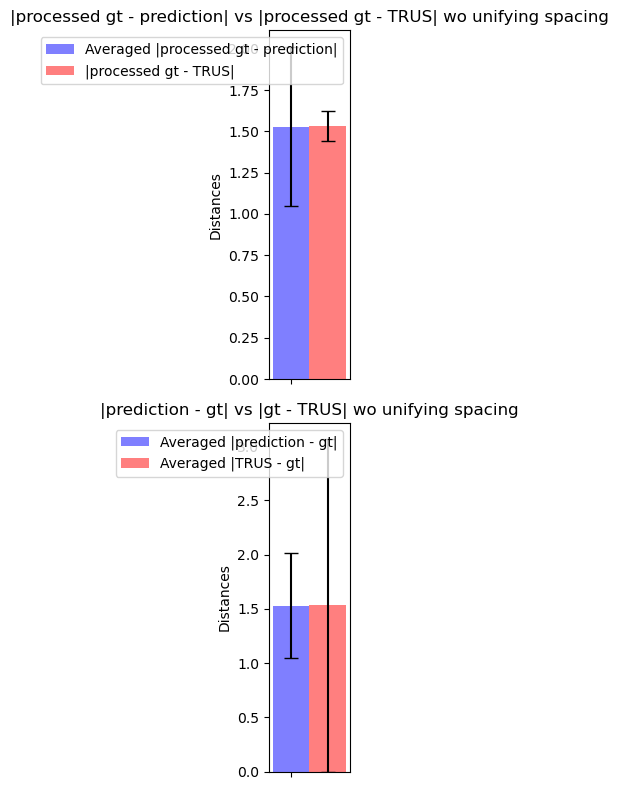

In [22]:
fig, axes = plt.subplots(2, 1, figsize=(4, 8))
bar_width = 0.35

# 첫 번째 plot
axes[0].bar([1], [np.mean(mean_ab)], bar_width, yerr=[np.std(mean_ab)], color='b', alpha=0.5, capsize=5, label='Averaged |processed gt - prediction|')
axes[0].bar([1 + bar_width], [np.mean(mean_ad)], bar_width, color='r', yerr=[np.std(mean_ad)], alpha=0.5, capsize=5, label='|processed gt - TRUS|')
axes[0].set_xticks([1])
axes[0].set_xticklabels([''])
axes[0].set_ylabel('Distances')
axes[0].set_title('|processed gt - prediction| vs |processed gt - TRUS| wo unifying spacing')
axes[0].legend()

# 두 번째 plot
axes[1].bar([1], [np.mean(mean_bc)], bar_width, yerr=[np.std(mean_bc)], color='b', alpha=0.5, capsize=5, label='Averaged |prediction - gt|')
axes[1].bar([1 + bar_width], [np.mean(mean_dc)], bar_width, yerr=[np.mean(mean_dc)], color='r', alpha=0.5, capsize=5, label='Averaged |TRUS - gt|')
axes[1].set_xticks([1])
axes[1].set_xticklabels([''])
axes[1].set_ylabel('Distances')
axes[1].set_title('|prediction - gt| vs |gt - TRUS| wo unifying spacing')
axes[1].legend()

plt.tight_layout()
plt.show()

### 가장 성능이 좋았던 fold2의 모델을 가지고 전체 labeled data에 대한 segmentation 수행 후 volume 추정

In [23]:
# import os

# 디렉토리 경로 설정
directory_path = '/data/hanyang_Prostate/Prostate/prostate_1c_test_result/test_230922_bestmodel_total_w_spacing/bestmodel_230922/'
directory_path_realgt = '/data/hanyang_Prostate/50_example/original/1_50_trim_20230130/Total volume/'

a = [] # volume_gt list
b = [] # volume_pred list
c = [] # volume_realgt list
d = [] # volume_TRUS
cnt = 0
# 디렉토리 내의 모든 파일 검색
for filename in os.listdir(directory_path):
    # 파일 이름이 "_gt.nii.gz"로 끝나는 경우에만 처리
    if filename.endswith('_gt.nii.gz'):
        # 파일의 전체 경로 생성
        gt_file_path = os.path.join(directory_path, filename)
        
        # 해당 _gt 파일과 동일한 이름 구조를 가진 _pred 파일 찾기
        pred_filename = filename.replace('_gt.nii.gz', '_pred.nii.gz')
        pred_file_path = os.path.join(directory_path, pred_filename)

        # _pred 파일이 존재하면 계산 수행
        if os.path.exists(pred_file_path):
            # _gt 파일의 정보를 읽어오고 volume 계산
            mask_voxel_count_gt, pixel_spacing_x_gt, pixel_spacing_y_gt, slice_gap_gt = read_nifti_spacing_and_mask_count(gt_file_path)
            volume_gt = calculate_volume(mask_voxel_count_gt, pixel_spacing_x_gt, pixel_spacing_y_gt, slice_gap_gt)
            
            # _pred 파일의 정보를 읽어오고 volume 계산
            mask_voxel_count_pred, pixel_spacing_x_pred, pixel_spacing_y_pred, slice_gap_pred = read_nifti_spacing_and_mask_count(pred_file_path)
            volume_pred = calculate_volume(mask_voxel_count_pred, pixel_spacing_x_pred, pixel_spacing_y_pred, slice_gap_pred)
            
            # 검색할 문자열 설정
            a_value = filename.split("_")[1]

            # /data/hanyang_Prostate/50_example/original/1_50_trim_20230130/Total volume/ 디렉토리 내의 파일 검색
            for realgt_filename in os.listdir(directory_path_realgt):
                # 파일 이름에 검색할 문자열이 포함되어 있는지 확인
                if a_value in realgt_filename:
                    mask_voxel_count_realgt, pixel_spacing_x_realgt, pixel_spacing_y_realgt, slice_gap_realgt = read_nifti_spacing_and_mask_count(os.path.join(directory_path_realgt,realgt_filename))
                    volume_realgt = calculate_volume(mask_voxel_count_realgt, pixel_spacing_x_realgt, pixel_spacing_y_realgt, slice_gap_realgt)
                    
                    if a_value in TRUS:
                        cnt += 1
                        # 값 저장
                        a.append(volume_gt)
                        b.append(volume_pred)
                        c.append(volume_realgt)
                        d.append(TRUS[a_value])
                        # 출력
                        print(f"No.: {a_value}")
                        print(f"\t Volume (TRUS): {TRUS[a_value]}")
                        print(f"\t Pixel Spacing X (realgt): {np.round(float(pixel_spacing_x_realgt),3)}")
                        print(f"\t Volume (realgt): {np.round(volume_realgt,1)}")
                        print(f"\t Pixel Spacing X (gt): {np.round(float(pixel_spacing_x_gt),3)}")
                        print(f"\t Volume (gt): {np.round(volume_gt,1)}")
                        print(f"\t Pixel Spacing X (pred): {np.round(float(pixel_spacing_x_pred),3)}")
                        print(f"\t Volume (pred): {np.round(volume_pred,1)}")
                        print("-----------------------------------------")
                    
# |a-b|와 |b-c| 계산
abs_diff_ab = np.abs(np.array(a) - np.array(b))
abs_diff_bc = np.abs(np.array(b) - np.array(c))

# |a-d|와 |d-c| 계산
abs_diff_ad = np.abs(np.array(a) - np.array(d))
abs_diff_dc = np.abs(np.array(d) - np.array(c))

# 평균과 표준편차 계산
mean_ab = np.mean(abs_diff_ab)
std_ab = np.std(abs_diff_ab)
mean_bc = np.mean(abs_diff_bc)
std_bc = np.std(abs_diff_bc)

# 결과 출력
print(f"|a-b| 평균: {mean_ab}")
print(f"|a-b| 표준편차: {std_ab}")
print(f"|b-c| 평균: {mean_bc}")
print(f"|b-c| 표준편차: {std_bc}")
print()

# 평균과 표준편차 계산
mean_ad = np.mean(abs_diff_ad)
std_ad = np.std(abs_diff_ad)
mean_dc = np.mean(abs_diff_dc)
std_dc = np.std(abs_diff_dc)

# 결과 출력
print(f"|a-d| 평균: {mean_ad}")
print(f"|a-d| 표준편차: {std_ad}")
print(f"|d-c| 평균: {mean_dc}")
print(f"|d-c| 표준편차: {std_dc}")
print()
print(cnt)

No.: 02953538
	 Volume (TRUS): 37.9
	 Pixel Spacing X (realgt): 0.782
	 Volume (realgt): 35.9
	 Pixel Spacing X (gt): 0.8
	 Volume (gt): 35.5
	 Pixel Spacing X (pred): 0.8
	 Volume (pred): 35.8
-----------------------------------------
No.: 02953540
	 Volume (TRUS): 28.1
	 Pixel Spacing X (realgt): 0.816
	 Volume (realgt): 27.1
	 Pixel Spacing X (gt): 0.8
	 Volume (gt): 27.0
	 Pixel Spacing X (pred): 0.8
	 Volume (pred): 26.8
-----------------------------------------
No.: 02953784
	 Volume (TRUS): 31.1
	 Pixel Spacing X (realgt): 0.782
	 Volume (realgt): 33.8
	 Pixel Spacing X (gt): 0.8
	 Volume (gt): 33.5
	 Pixel Spacing X (pred): 0.8
	 Volume (pred): 33.8
-----------------------------------------
No.: 02953958
	 Volume (TRUS): 29.0
	 Pixel Spacing X (realgt): 0.801
	 Volume (realgt): 26.5
	 Pixel Spacing X (gt): 0.8
	 Volume (gt): 26.4
	 Pixel Spacing X (pred): 0.8
	 Volume (pred): 25.1
-----------------------------------------
No.: 02954359
	 Volume (TRUS): 22.67
	 Pixel Spacing X (

No.: 02394910
	 Volume (TRUS): 49.1
	 Pixel Spacing X (realgt): 0.782
	 Volume (realgt): 54.6
	 Pixel Spacing X (gt): 0.8
	 Volume (gt): 54.5
	 Pixel Spacing X (pred): 0.8
	 Volume (pred): 57.0
-----------------------------------------
No.: 02572186
	 Volume (TRUS): 30.2
	 Pixel Spacing X (realgt): 0.782
	 Volume (realgt): 30.6
	 Pixel Spacing X (gt): 0.8
	 Volume (gt): 30.5
	 Pixel Spacing X (pred): 0.8
	 Volume (pred): 31.6
-----------------------------------------
No.: 02573669
	 Volume (TRUS): 32.9
	 Pixel Spacing X (realgt): 0.782
	 Volume (realgt): 32.5
	 Pixel Spacing X (gt): 0.8
	 Volume (gt): 32.3
	 Pixel Spacing X (pred): 0.8
	 Volume (pred): 32.2
-----------------------------------------
No.: 02603745
	 Volume (TRUS): 13.5
	 Pixel Spacing X (realgt): 0.782
	 Volume (realgt): 10.1
	 Pixel Spacing X (gt): 0.8
	 Volume (gt): 9.9
	 Pixel Spacing X (pred): 0.8
	 Volume (pred): 9.2
-----------------------------------------
No.: 02610498
	 Volume (TRUS): 23.2
	 Pixel Spacing X (rea

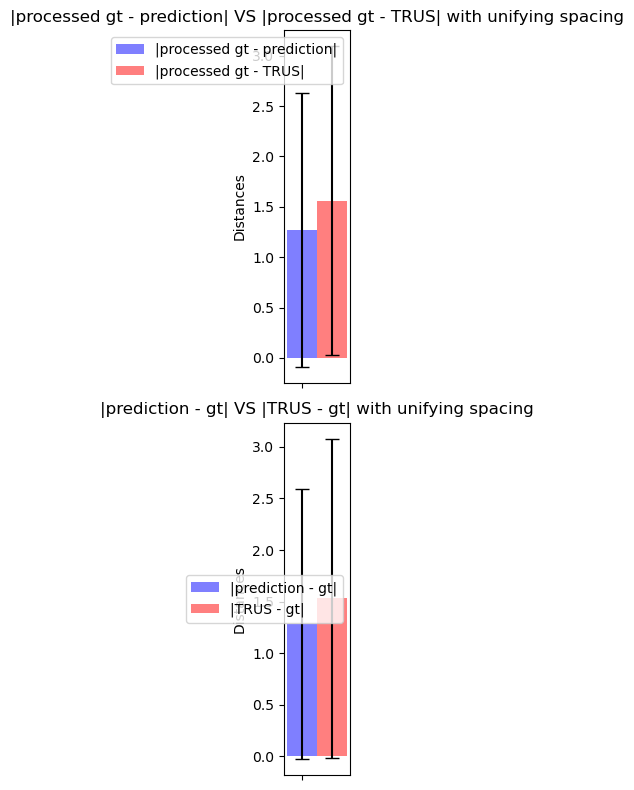

In [24]:
fig, axes = plt.subplots(2, 1, figsize=(4, 8))
bar_width = 0.35

# 첫 번째 plot
axes[0].bar([1], [mean_ab], bar_width, yerr=[std_ab], color='b', alpha=0.5, capsize=5, label='|processed gt - prediction|')
axes[0].bar([1 + bar_width], [mean_ad], bar_width, color='r', yerr=[std_ad], alpha=0.5, capsize=5, label='|processed gt - TRUS|')
axes[0].set_xticks([1])
axes[0].set_xticklabels([''])
axes[0].set_ylabel('Distances')
axes[0].set_title('|processed gt - prediction| VS |processed gt - TRUS| with unifying spacing')
axes[0].legend()

# 두 번째 plot
axes[1].bar([1], [mean_bc], bar_width, yerr=[std_bc], color='b', alpha=0.5, capsize=5, label='|prediction - gt|')
axes[1].bar([1 + bar_width], [mean_dc], bar_width, yerr=[std_dc], color='r', alpha=0.5, capsize=5, label='|TRUS - gt|')
axes[1].set_xticks([1])
axes[1].set_xticklabels([''])
axes[1].set_ylabel('Distances')
axes[1].set_title('|prediction - gt| VS |TRUS - gt| with unifying spacing')
axes[1].legend()

plt.tight_layout()
plt.show()

Correlation coefficient (a vs. c): 1.00
Correlation coefficient (a vs. b): 0.98
Correlation coefficient (c vs. b): 0.98
Correlation coefficient (a vs. d): 0.97
Correlation coefficient (c vs. d): 0.97
Linear Fit Parameters (a vs. c): slope=1.00, intercept=0.08
Linear Fit Parameters (a vs. b): slope=1.07, intercept=-1.87
Linear Fit Parameters (c vs. b): slope=1.07, intercept=-1.95
Linear Fit Parameters (a vs. d): slope=0.89, intercept=3.21
Linear Fit Parameters (c vs. d): slope=0.89, intercept=3.15
R-squared (a vs. c): 1.00
R-squared (a vs. b): 0.96
R-squared (c vs. b): 0.97
R-squared (a vs. d): 0.94
R-squared (c vs. d): 0.94


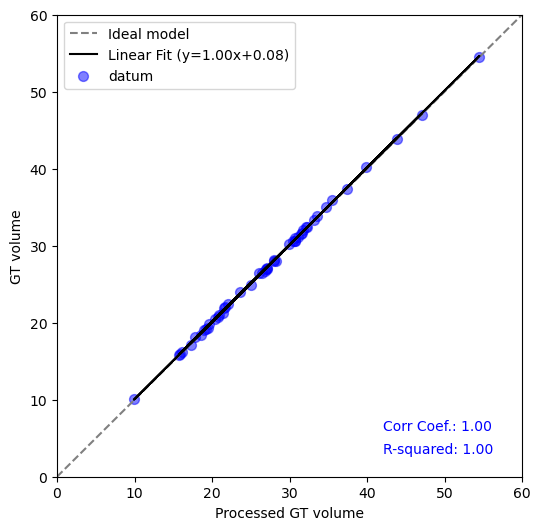

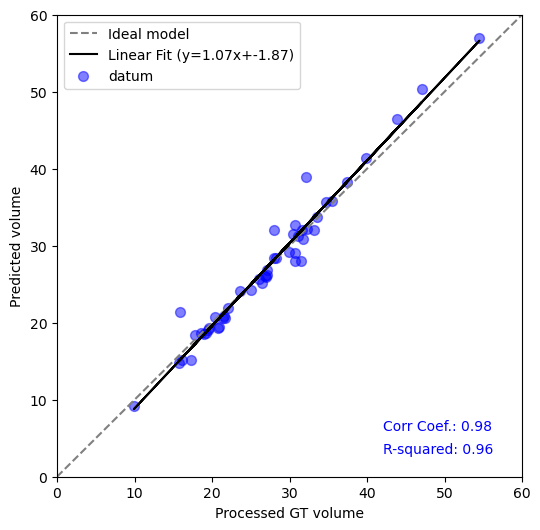

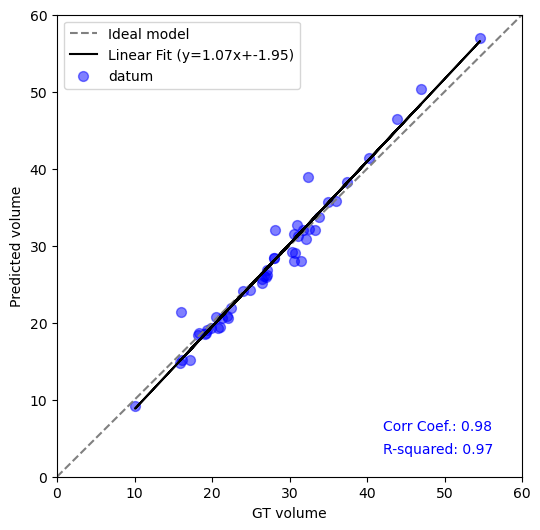

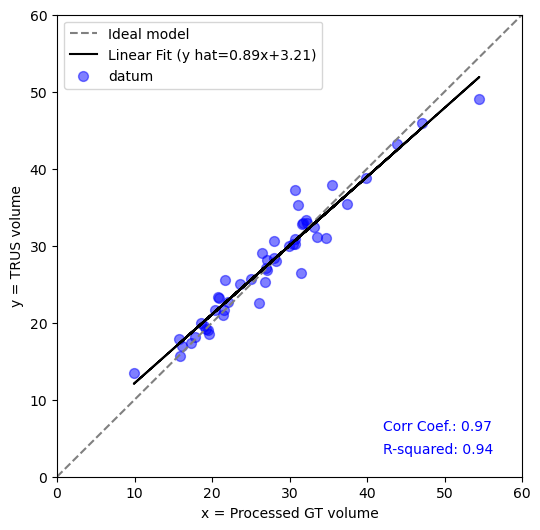

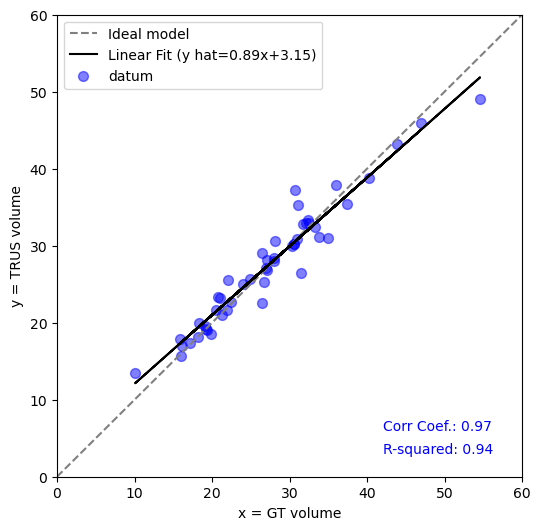

In [25]:
# import numpy as np
# import matplotlib.pyplot as plt
from scipy import stats

# correlation coefficient 계산 및 출력
corr_ac = np.corrcoef(a, c)[0, 1]
corr_ab = np.corrcoef(a, b)[0, 1]
corr_cb = np.corrcoef(c, b)[0, 1]
corr_ad = np.corrcoef(a, d)[0, 1]
corr_cd = np.corrcoef(c, d)[0, 1]

print(f'Correlation coefficient (a vs. c): {corr_ac:.2f}')
print(f'Correlation coefficient (a vs. b): {corr_ab:.2f}')
print(f'Correlation coefficient (c vs. b): {corr_cb:.2f}')
print(f'Correlation coefficient (a vs. d): {corr_ad:.2f}')
print(f'Correlation coefficient (c vs. d): {corr_cd:.2f}')

# least square linear fit 계산 및 출력
slope_ac, intercept_ac, r_value_ac, p_value_ac, std_err_cb = stats.linregress(a, c)
slope_ab, intercept_ab, r_value_ab, p_value_ab, std_err_ab = stats.linregress(a, b)
slope_cb, intercept_cb, r_value_cb, p_value_cb, std_err_cb = stats.linregress(c, b)
slope_ad, intercept_ad, r_value_ad, p_value_ad, std_err_ad = stats.linregress(a, d)
slope_cd, intercept_cd, r_value_cd, p_value_cd, std_err_cd = stats.linregress(c, d)

print(f'Linear Fit Parameters (a vs. c): slope={slope_ac:.2f}, intercept={intercept_ac:.2f}')
print(f'Linear Fit Parameters (a vs. b): slope={slope_ab:.2f}, intercept={intercept_ab:.2f}')
print(f'Linear Fit Parameters (c vs. b): slope={slope_cb:.2f}, intercept={intercept_cb:.2f}')
print(f'Linear Fit Parameters (a vs. d): slope={slope_ad:.2f}, intercept={intercept_ad:.2f}')
print(f'Linear Fit Parameters (c vs. d): slope={slope_cd:.2f}, intercept={intercept_cd:.2f}')

# r-squared 계산 및 출력
r_squared_ac = r_value_ac**2
r_squared_ab = r_value_ab**2
r_squared_cb = r_value_cb**2
r_squared_ad = r_value_ad**2
r_squared_cd = r_value_cd**2

print(f'R-squared (a vs. c): {r_squared_ac:.2f}')
print(f'R-squared (a vs. b): {r_squared_ab:.2f}')
print(f'R-squared (c vs. b): {r_squared_cb:.2f}')
print(f'R-squared (a vs. d): {r_squared_ad:.2f}')
print(f'R-squared (c vs. d): {r_squared_cd:.2f}')

# a와 c 간의 산점도
plt.figure(figsize=(6,6))
plt.scatter(a, c, s=50, edgecolor='b', facecolor='b', alpha=0.5, label='datum')
plt.ylim(0,60)
plt.xlim(0,60)
plt.xlabel("Processed GT volume")
plt.ylabel("GT volume")
# x=y 선 그리기 (점선)
plt.plot([0,60], [0,60], linestyle='--', color='gray', label='Ideal model')
plt.plot(np.array(a), slope_ac * np.array(a) + intercept_ac, color='black', label=f'Linear Fit (y={slope_ac:.2f}x+{intercept_ac:.2f})')
# Correlation coefficient와 r-squared 값 출력
corr_coefficient_text = f'Corr Coef.: {corr_ac:.2f}'
r_squared_text = f'R-squared: {r_squared_ac:.2f}'
plt.text(0.7, 0.1, corr_coefficient_text, c='b', transform=plt.gca().transAxes)
plt.text(0.7, 0.05, r_squared_text, c='b', transform=plt.gca().transAxes)
# 그래프 표시
plt.legend()
plt.show()


# a와 b 간의 산점도
plt.figure(figsize=(6,6))
plt.scatter(a, b, s=50, edgecolor='b', facecolor='b', alpha=0.5, label='datum')
plt.ylim(0,60)
plt.xlim(0,60)
plt.xlabel("Processed GT volume")
plt.ylabel("Predicted volume")
# x=y 선 그리기 (점선)
plt.plot([0,60], [0,60], linestyle='--', color='gray', label='Ideal model')
plt.plot(np.array(a), slope_ab * np.array(a) + intercept_ab, color='black', label=f'Linear Fit (y={slope_ab:.2f}x+{intercept_ab:.2f})')
# Correlation coefficient와 r-squared 값 출력
corr_coefficient_text = f'Corr Coef.: {corr_ab:.2f}'
r_squared_text = f'R-squared: {r_squared_ab:.2f}'
plt.text(0.7, 0.1, corr_coefficient_text, c='b', transform=plt.gca().transAxes)
plt.text(0.7, 0.05, r_squared_text, c='b', transform=plt.gca().transAxes)
# 그래프 표시
plt.legend()
plt.show()

plt.figure(figsize=(6,6))
# b와 c 간의 산점도
plt.scatter(c, b, s=50, edgecolor='b', facecolor='b', alpha=0.5, label='datum')
plt.ylim(0,60)
plt.xlim(0,60)
plt.xlabel("GT volume")
plt.ylabel("Predicted volume")
# x=y 선 그리기 (점선)
plt.plot([0,60], [0,60], linestyle='--', color='gray', label='Ideal model')
plt.plot(np.array(c), slope_cb * np.array(c) + intercept_cb, color='black', label=f'Linear Fit (y={slope_cb:.2f}x+{intercept_cb:.2f})')
# Correlation coefficient와 r-squared 값 출력
corr_coefficient_text = f'Corr Coef.: {corr_cb:.2f}'
r_squared_text = f'R-squared: {r_squared_cb:.2f}'
plt.text(0.7, 0.1, corr_coefficient_text, c='b', transform=plt.gca().transAxes)
plt.text(0.7, 0.05, r_squared_text, c='b', transform=plt.gca().transAxes)
# 그래프 표시
plt.legend()
plt.show()

plt.figure(figsize=(6,6))
# a와 d 간의 산점도
plt.scatter(a, d, s=50, edgecolor='b', facecolor='b', alpha=0.5, label='datum')
plt.ylim(0,60)
plt.xlim(0,60)
plt.xlabel("x = Processed GT volume")
plt.ylabel("y = TRUS volume")
# x=y 선 그리기 (점선)
plt.plot([0,60], [0,60], linestyle='--', color='gray', label='Ideal model')
plt.plot(np.array(a), slope_ad * np.array(a) + intercept_ad, color='black', label=f'Linear Fit (y hat={slope_ad:.2f}x+{intercept_ad:.2f})')
# Correlation coefficient와 r-squared 값 출력
corr_coefficient_text = f'Corr Coef.: {corr_ad:.2f}'
r_squared_text = f'R-squared: {r_squared_ad:.2f}'
plt.text(0.7, 0.1, corr_coefficient_text, c='b', transform=plt.gca().transAxes)
plt.text(0.7, 0.05, r_squared_text, c='b', transform=plt.gca().transAxes)
# 그래프 표시
plt.legend()
plt.show()

plt.figure(figsize=(6,6))
# c와 d 간의 산점도
plt.scatter(c, d, s=50, edgecolor='b', facecolor='b', alpha=0.5, label='datum')
plt.ylim(0,60)
plt.xlim(0,60)
plt.xlabel("x = GT volume")
plt.ylabel("y = TRUS volume")
# x=y 선 그리기 (점선)
plt.plot([0,60], [0,60], linestyle='--', color='gray', label='Ideal model')
plt.plot(np.array(c), slope_cd * np.array(c) + intercept_cd, color='black', label=f'Linear Fit (y hat={slope_cd:.2f}x+{intercept_cd:.2f})')
# Correlation coefficient와 r-squared 값 출력
corr_coefficient_text = f'Corr Coef.: {corr_cd:.2f}'
r_squared_text = f'R-squared: {r_squared_cd:.2f}'
plt.text(0.7, 0.1, corr_coefficient_text, c='b', transform=plt.gca().transAxes)
plt.text(0.7, 0.05, r_squared_text, c='b', transform=plt.gca().transAxes)
# 그래프 표시
plt.legend()
plt.show()

### 원본 데이터의 Spacing 분포 히스토그램 및 통계값 확인

Mean: 0.7736938775510205
Median: 0.782
Standard Deviation: 0.03823461626436135
Min: 0.656
Max: 0.866


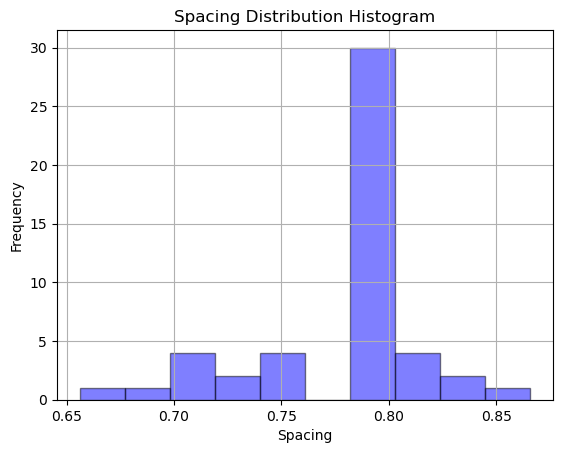

In [26]:
dist_spacing = np.array([0.782, 0.755, 0.709, 0.782, 0.782, 0.782, 0.782, 0.732, 0.782, 0.709, 0.782, 0.782, 0.824, 0.782, 0.782, 0.782, 0.782, 0.656, 0.782, 0.782, 0.782, 0.782, 0.782, 0.732, 0.816, 0.782, 0.782, 0.782, 0.782, 0.782, 0.866, 0.782, 0.743, 0.717, 0.74, 0.74, 0.782, 0.709, 0.831, 0.782, 0.816, 0.782, 0.801, 0.782, 0.835, 0.682, 0.82, 0.782, 0.782])


# 히스토그램 생성
plt.hist(dist_spacing, facecolor='b', alpha=0.5, bins=10, edgecolor='k')
plt.xlabel('Spacing')
plt.ylabel('Frequency')
plt.title('Spacing Distribution Histogram')
plt.grid(True)

# 통계값 계산
mean_value = np.mean(dist_spacing)
median_value = np.median(dist_spacing)
std_deviation = np.std(dist_spacing)
min_value = np.min(dist_spacing)
max_value = np.max(dist_spacing)

# 통계값 출력
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Standard Deviation: {std_deviation}")
print(f"Min: {min_value}")
print(f"Max: {max_value}")

# 그래프 표시
plt.show()